In [5]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle
import hist
import mplhep as hep
from TUnfold import *
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

objc[77369]: Class RunStopper is implemented in both /Users/ren/Applications/root/lib/libCore.6.28.06.so (0x105869148) and /usr/local/lib/libCore.so (0x11e9c11f0). One of the two will be used. Which one is undefined.


Welcome to JupyROOT 6.28/06
0.7.21
4.3.7


In [6]:
#### open files                                                                                                                                               
# fname="coffeaOutput/trijetHists_wXSscaling_QCDsim_newMBins_rapidity2.5_nominal2018.pkl"
fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_newMBinsDR_rapidity2.5_nominal2018.pkl"
year = fname[-8:-4]
with open(fname, "rb") as f:
    result = pickle.load( f )

if "dijet" in fname:
    os_path = "plots/unfolding/dijet/"
    channel = "Dijet"
else:
    os_path = "plots/unfolding/trijet/"
    channel = "Trijet"
checkdir(os_path)
os_path=os_path
print(year)                                                                                                                                                    
axis_names = [ax.name for ax in result['ptreco_mreco_u'].axes]
cats = [cat for cat in result['ptreco_mreco_u'].project('ptreco','mreco').axes[0]]
availSysts = [ax for ax in result['ptreco_mreco_u'].project("syst").axes[0]]


2018


[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=0, variance=0)
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


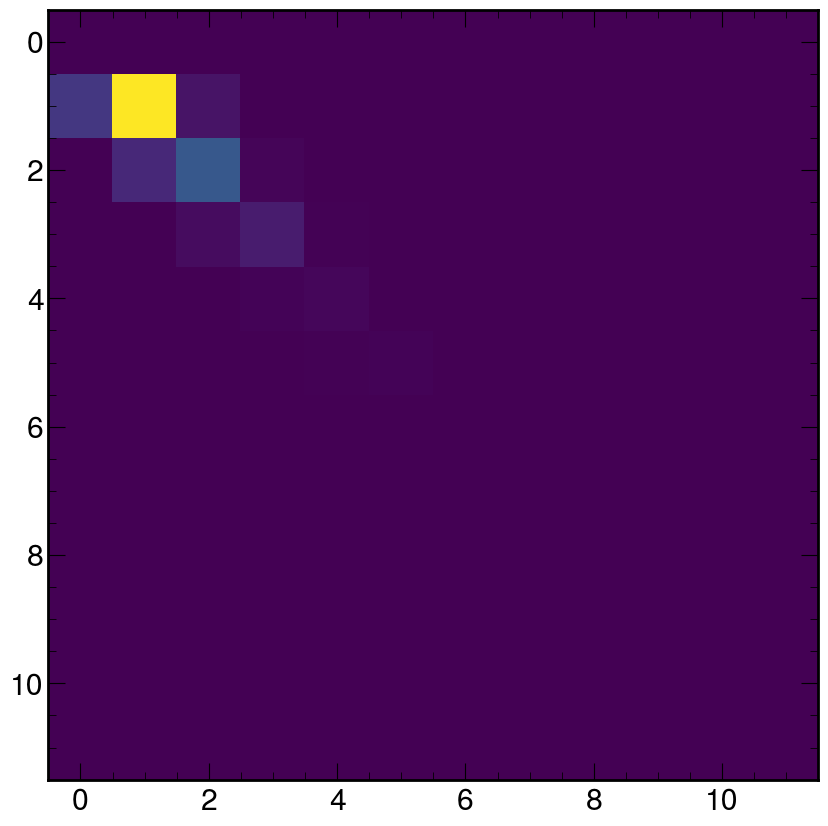

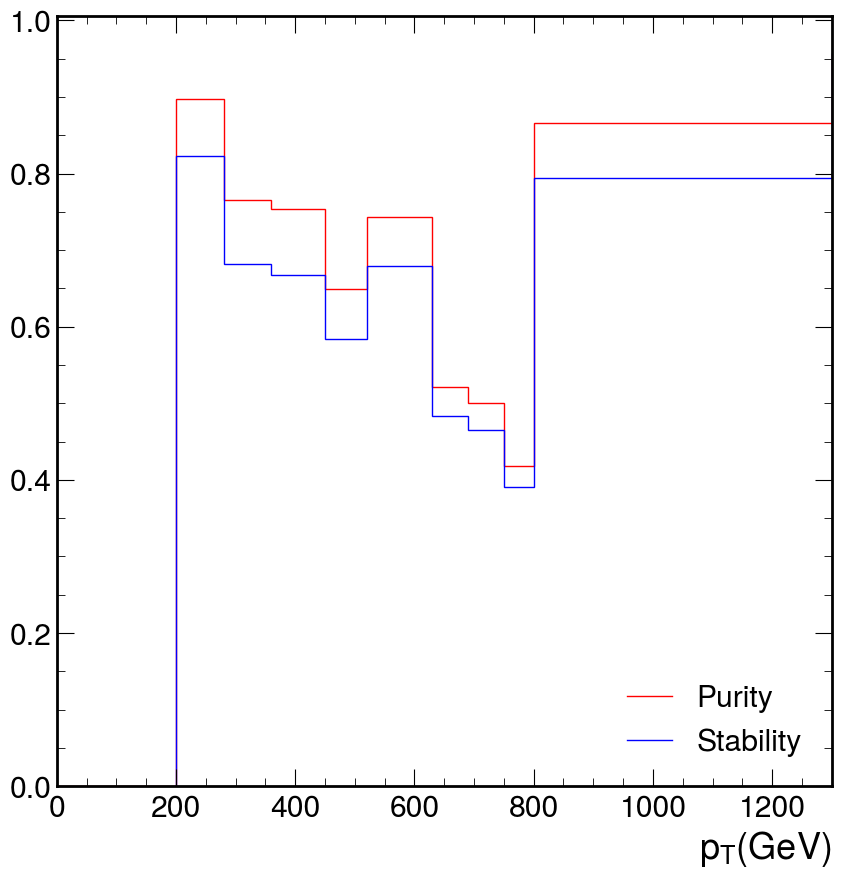

In [87]:
#### Get 1D pT response including underflow
ptresponse_u, ptreco_edges, ptgen_edges = result['response_matrix_u'][{'syst':"nominal"}].project("ptreco", "ptgen").to_numpy(flow=True)
plt.imshow(ptresponse_u)
ptreco_edges[0]=0.
ptgen_edges[0]=0.
print(ptgen_edges)
pt_diags = np.array([ptresponse_u[i,i] for i in range(len(ptgen_edges)-1)])
print(pt_diags)
ptgen_tot_vals = result['response_matrix_u'][{'syst':"nominal"}].project("ptgen").values(flow=True)
ptreco_tot_vals = result['response_matrix_u'][{'syst':"nominal"}].project("ptreco").values(flow=True)
purity_vals = np.divide(pt_diags, ptgen_tot_vals, out=np.empty(pt_diags.shape)*np.nan, where=ptgen_tot_vals!=0)
stability_vals = np.divide(pt_diags, ptreco_tot_vals, out=np.empty(pt_diags.shape)*np.nan, where=ptreco_tot_vals!=0)
print(ptreco_hist[hist.underflow])
fig, ax = plt.subplots()
hep.histplot(purity_vals, ptreco_edges, stack=False, histtype='step',
                 ax=ax,color = 'Red', linewidth=1,
                 label="Purity")
print(ptgen_hist[hist.underflow])
hep.histplot(stability_vals, ptreco_edges, stack=False, histtype='step',
                 ax=ax, color = 'Blue', linewidth=1,
                 label="Stability")
ax.set_xlim(0,1300)
ax.set_xlabel(r"$p_T (GeV)$")
ax.legend()
# fig, ax = plt.subplots()
# hep.histplot(mcvals, stack=False, histtype='step',
#                  ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
#                  label=channel + " MC")


In [51]:
print(ptgen_edges)
print(ptgen_edges[1:]-ptgen_edges[:-1])
ptgen_edges_new = np.array([ 0.,200.,260.,350.,450.,550.,650.,800.,1300., 13000.,np.inf])
print(ptgen_edges_new[1:]-ptgen_edges_new[:-1])

[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[  200.    80.    80.    90.    70.   110.    60.    60.    50.   500.
 11700.    inf]
[  200.    80.    80.    90.   100.   100.   150.   500. 11700.    inf]


0
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


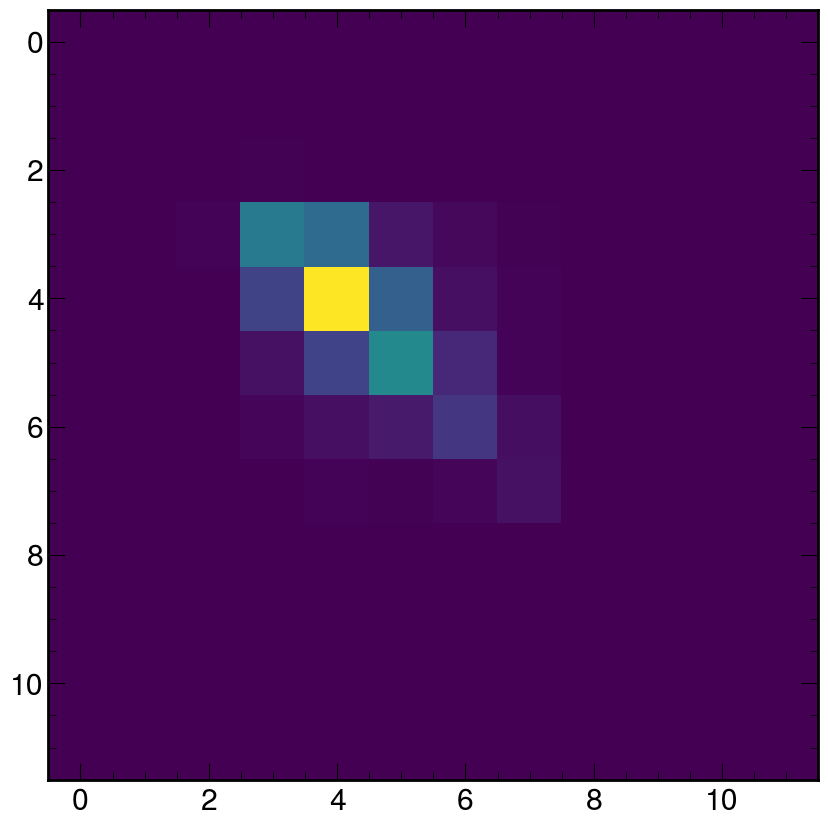

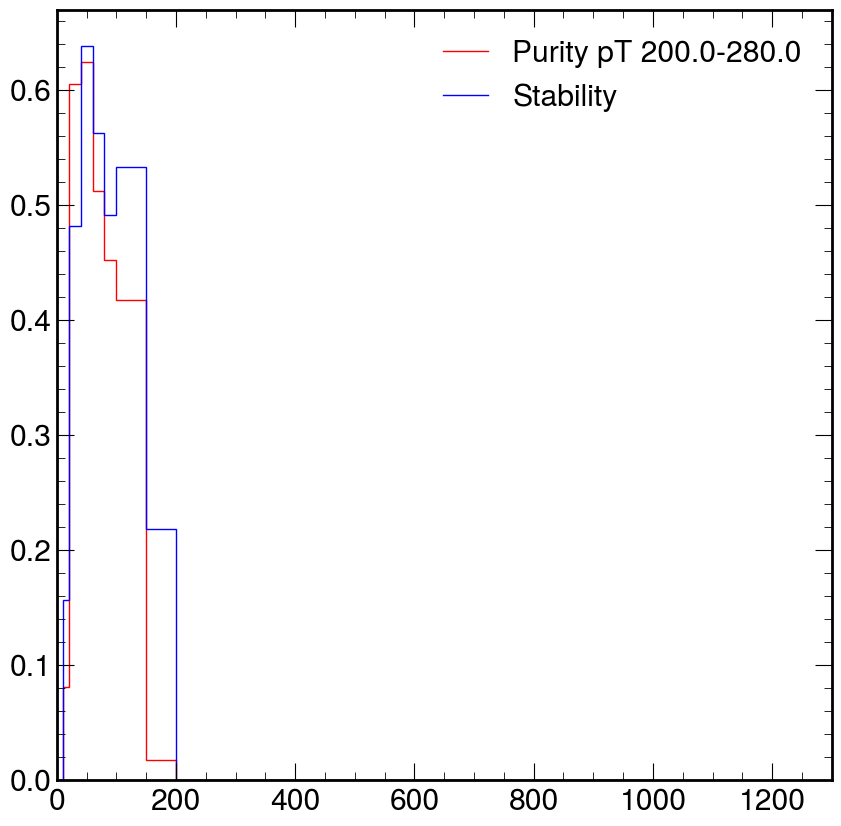

1
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


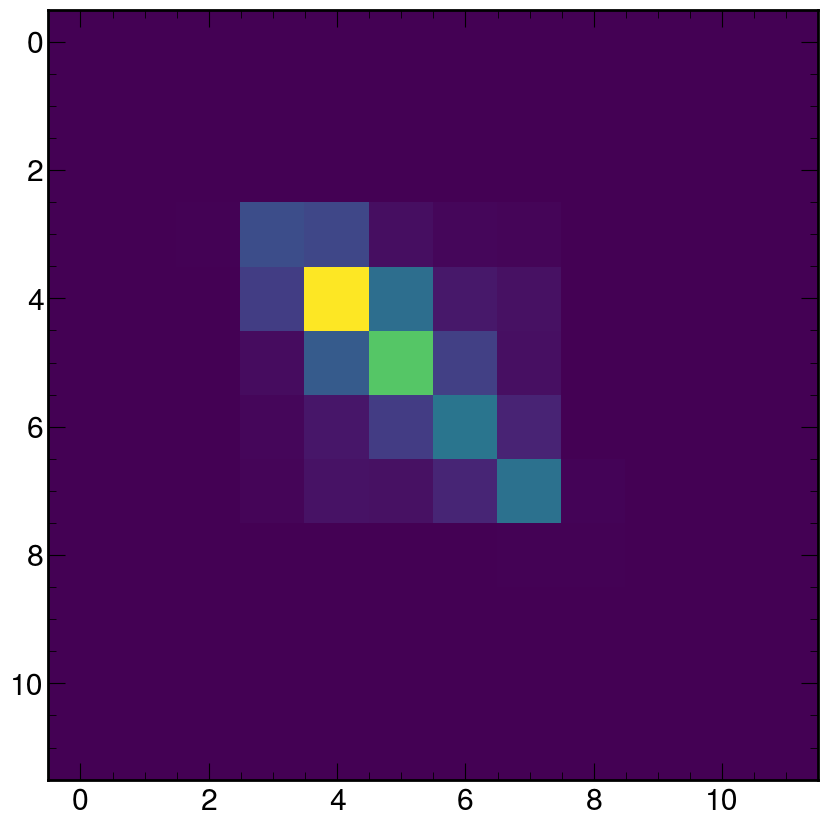

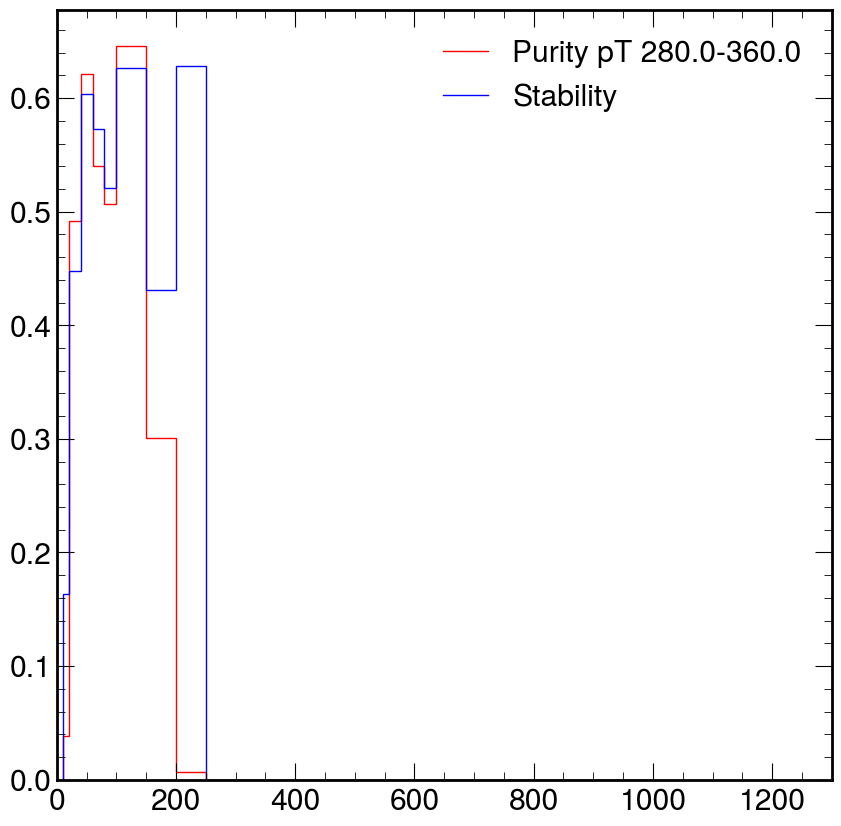

2
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


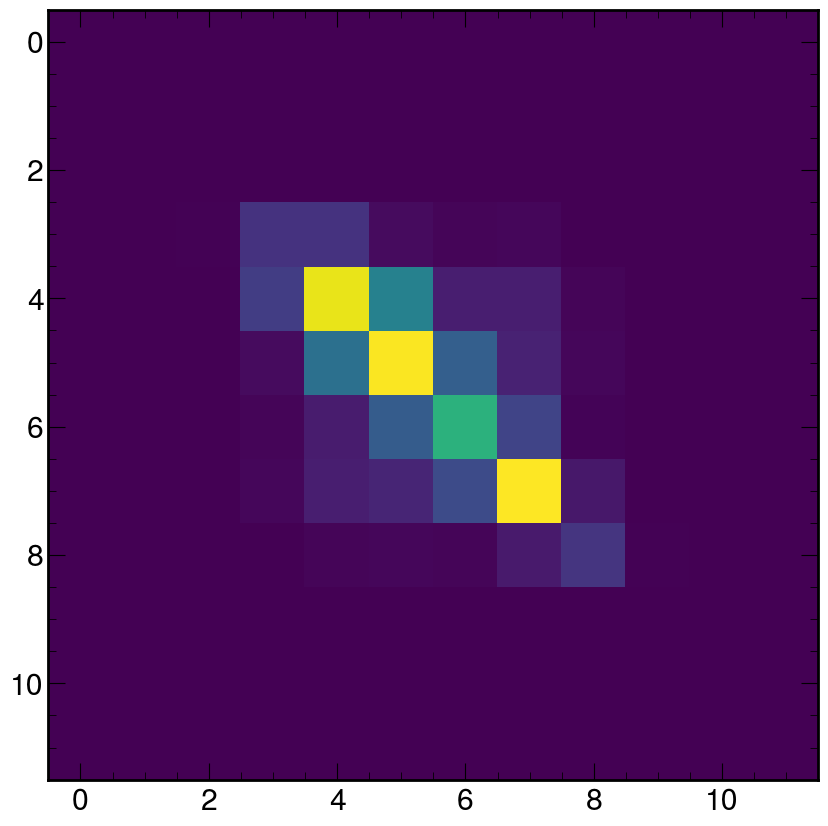

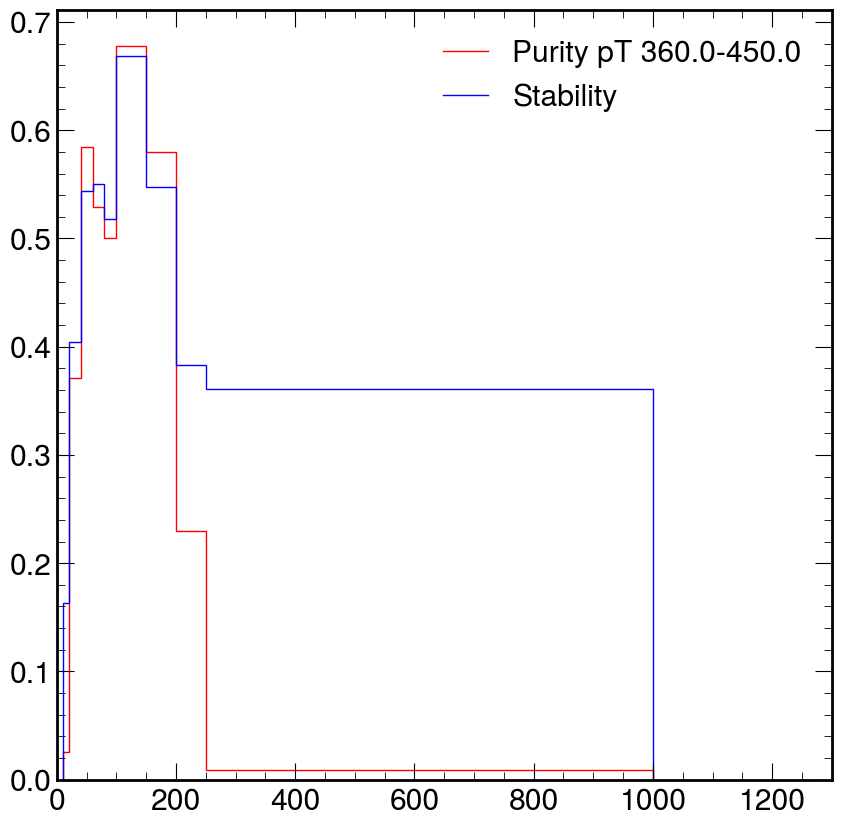

3
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


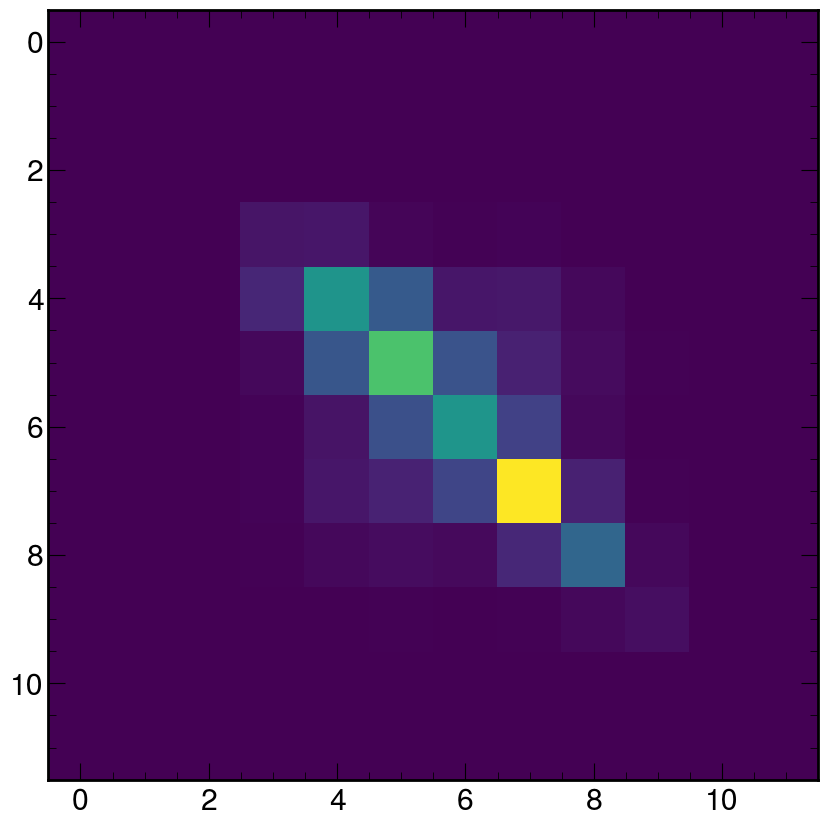

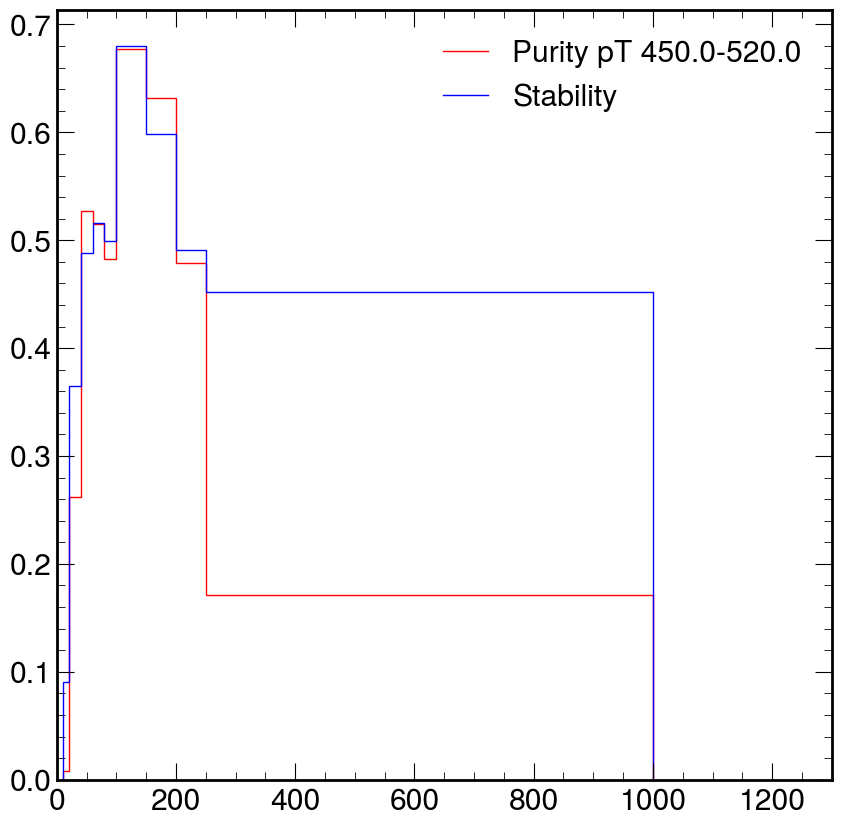

4
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


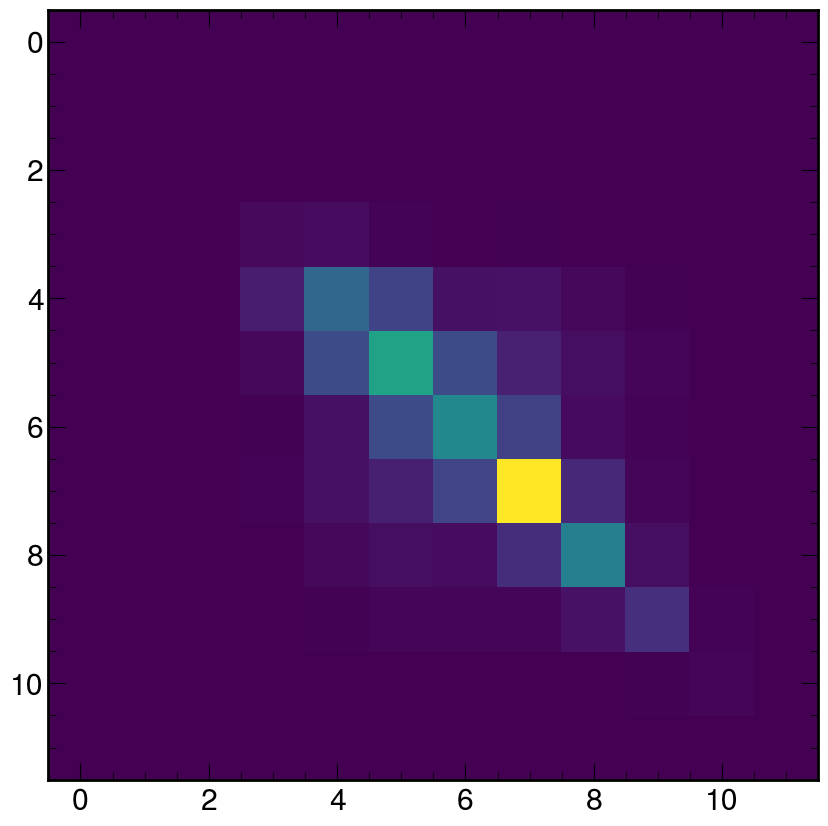

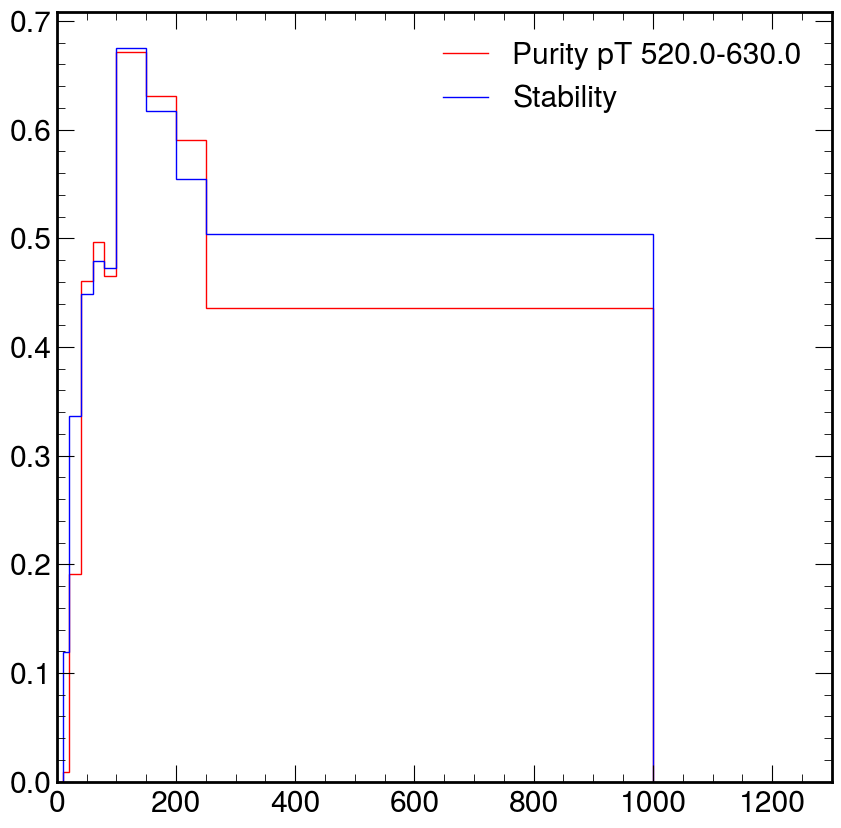

5
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


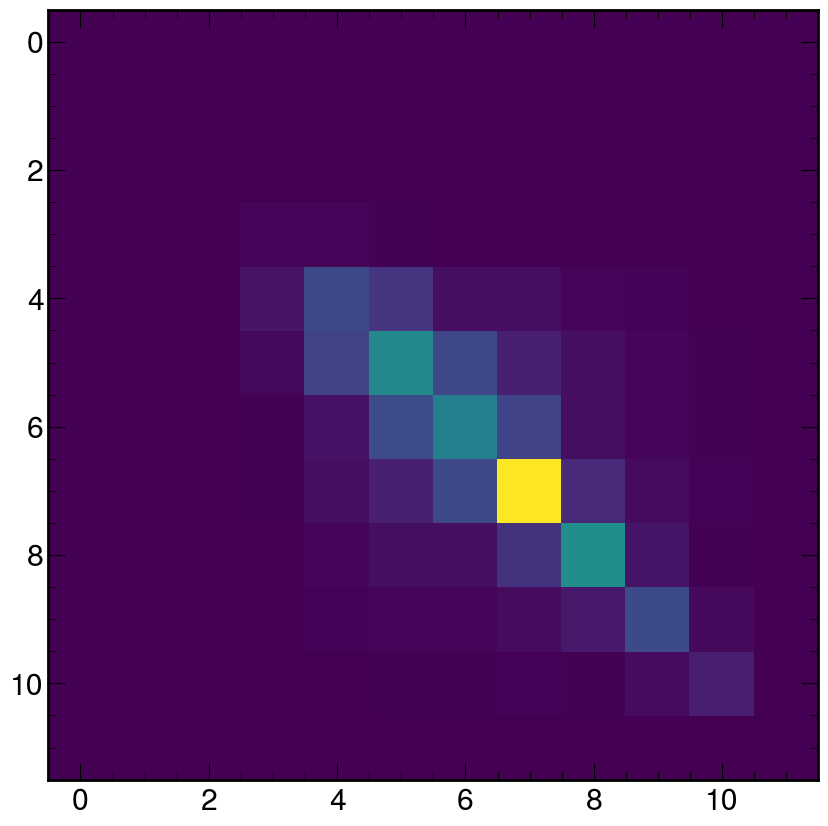

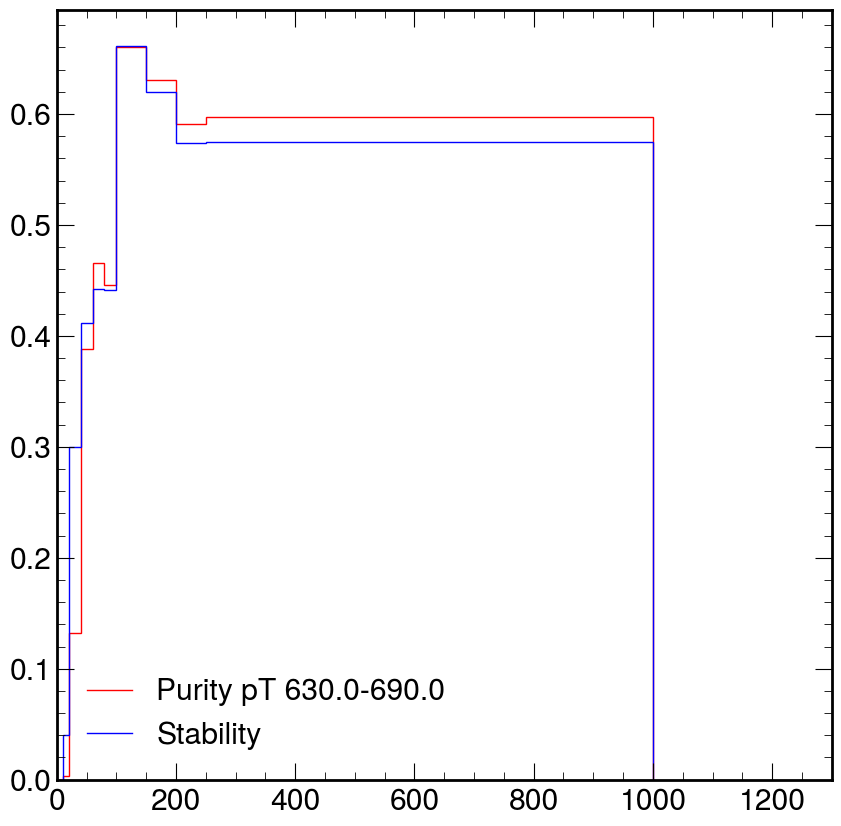

6
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


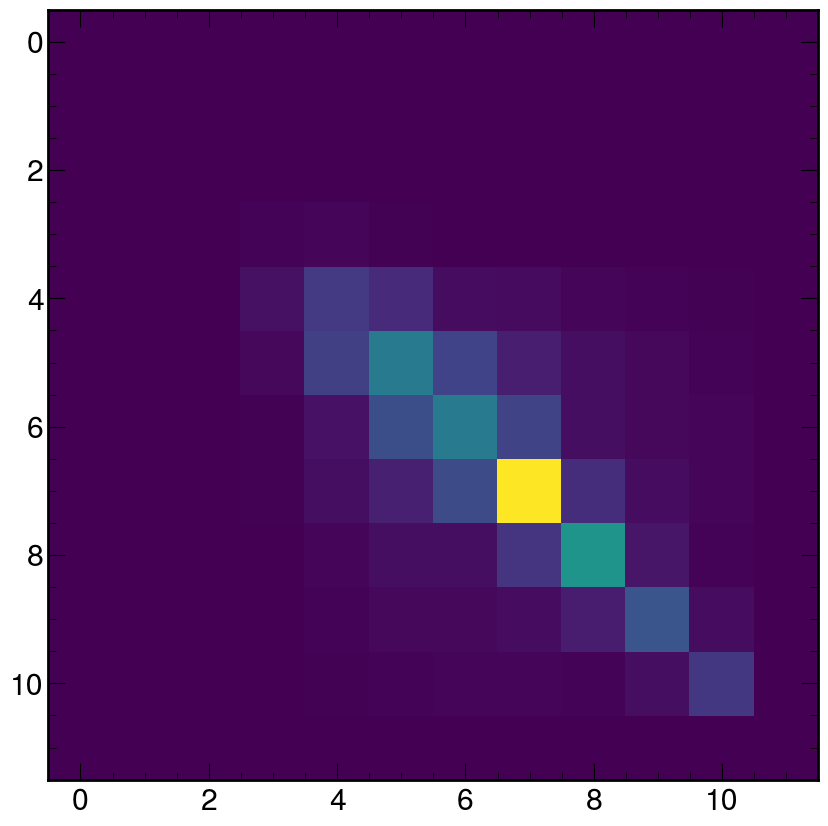

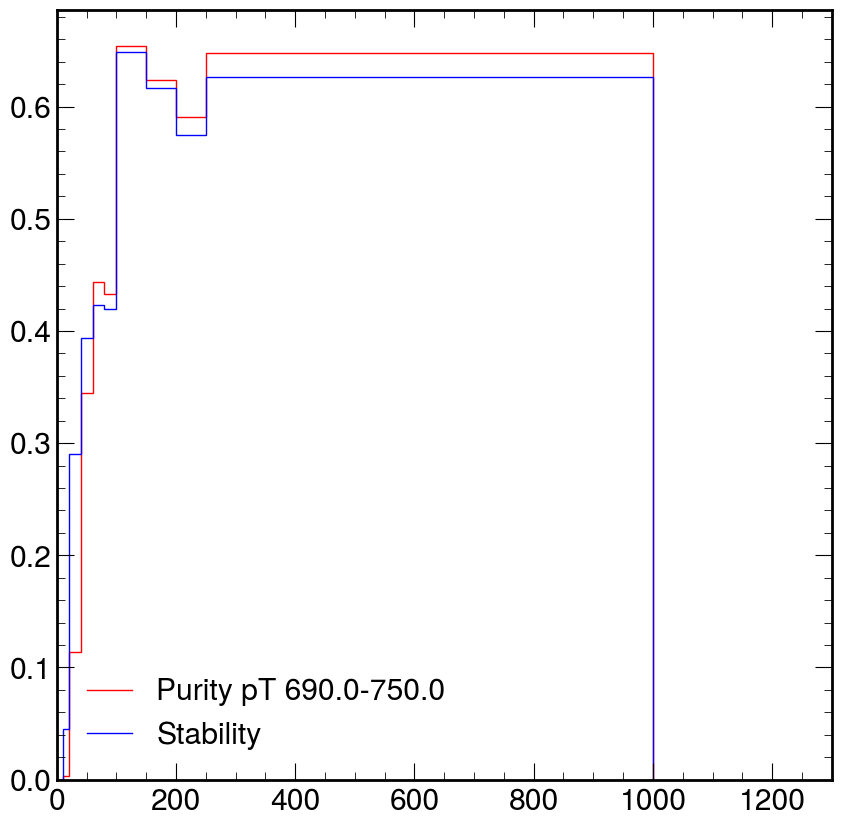

7
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


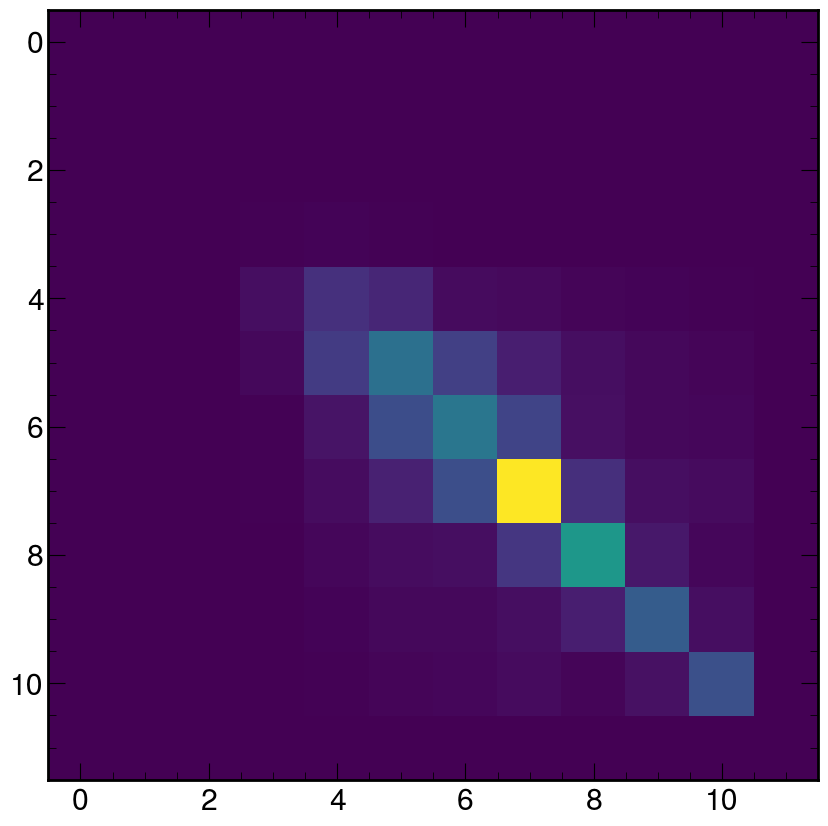

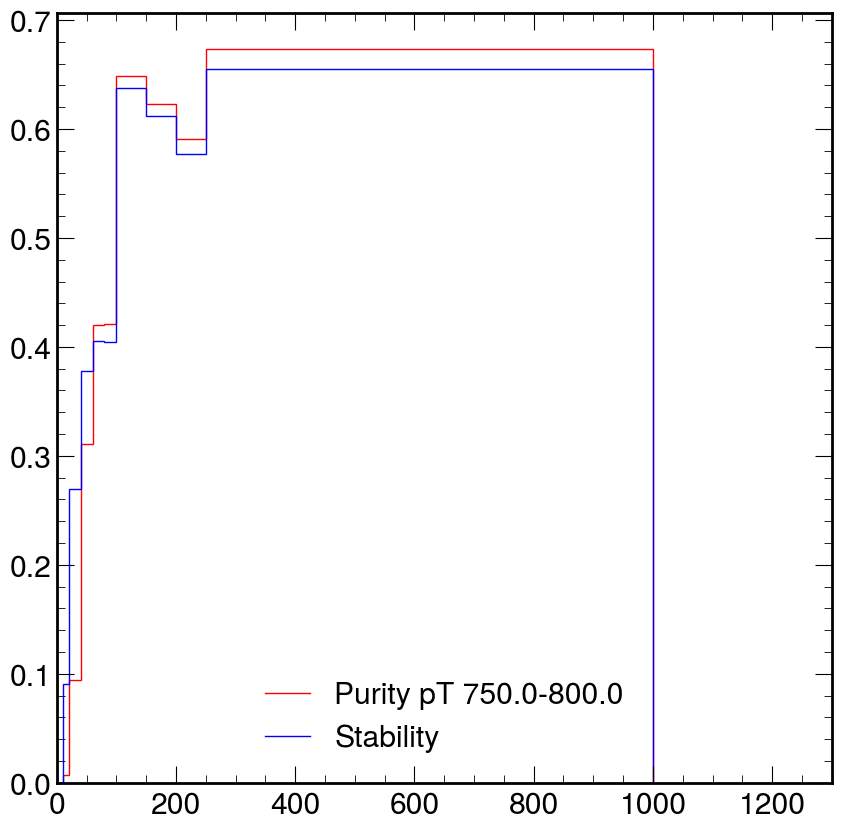

8
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


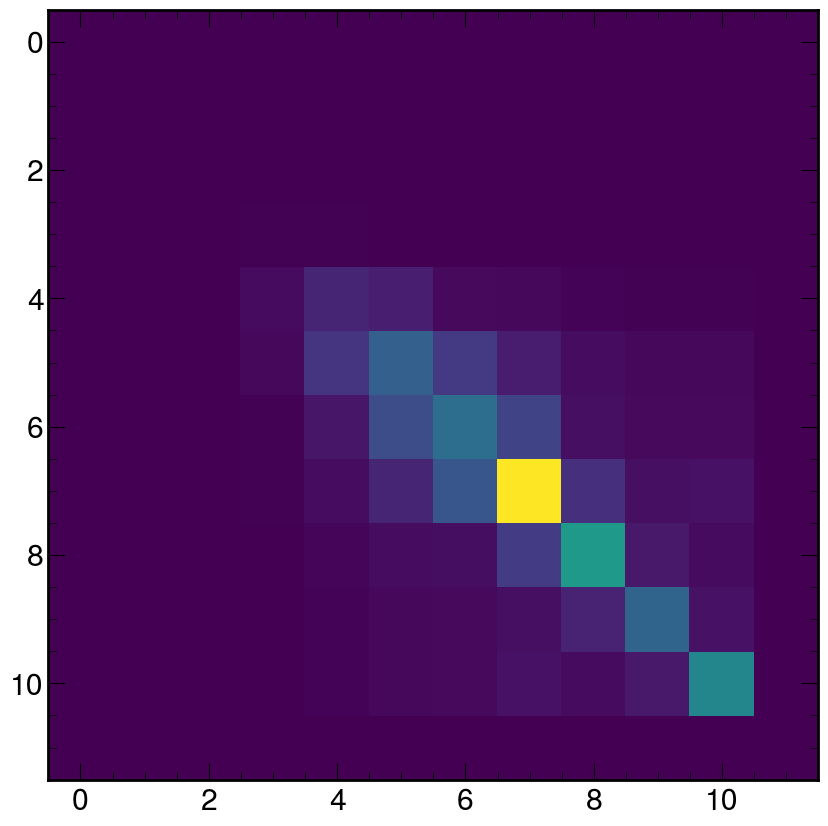

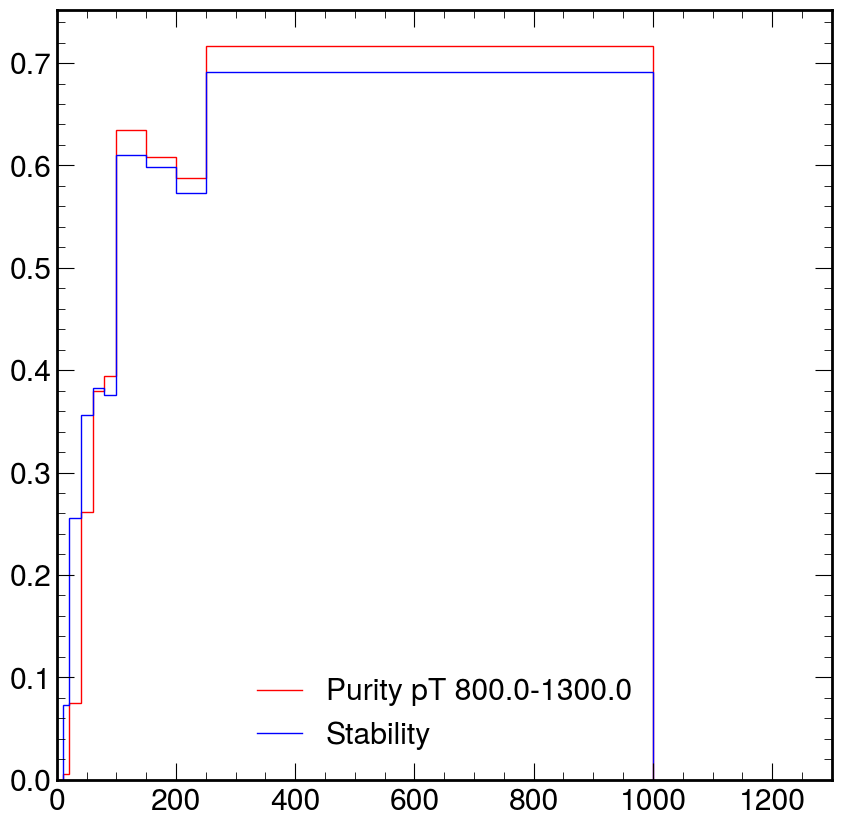

9
[    0.   200.   280.   360.   450.   520.   630.   690.   750.   800.
  1300. 13000.    inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


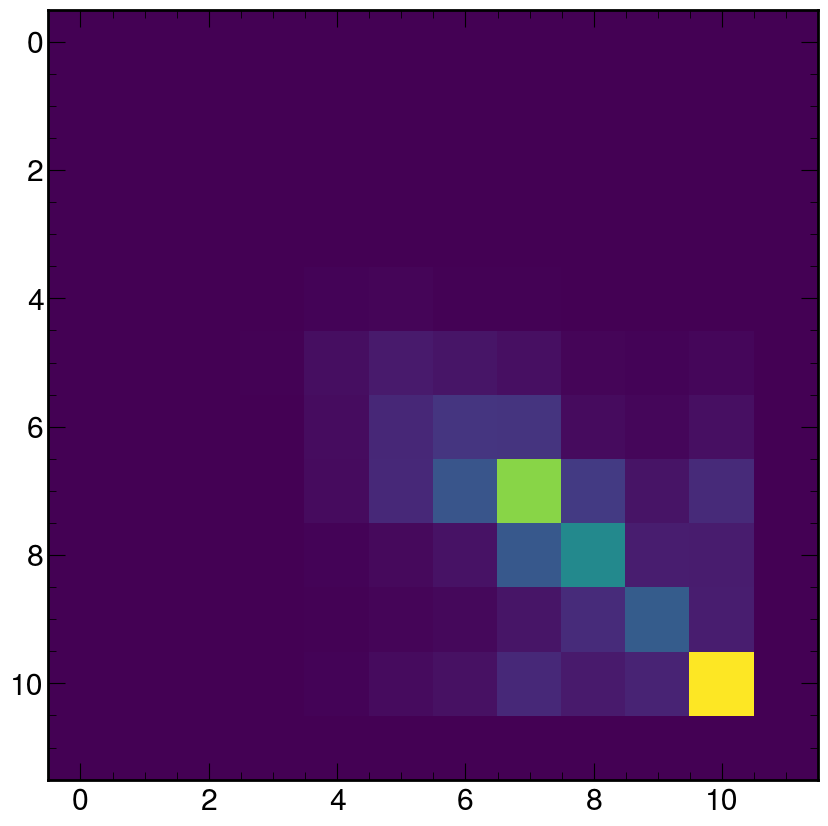

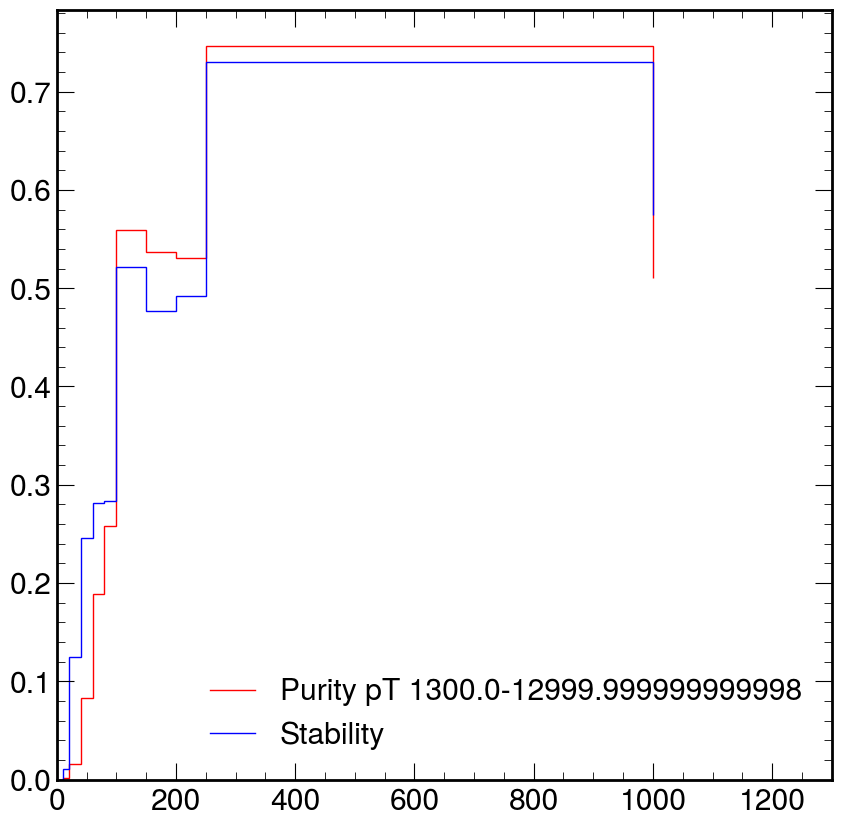

In [71]:
#### Get 1D pT response including underflow
for i in range(len(ptreco_edges)-3):
    print(i)
    mresponse_u, mreco_edges, mgen_edges = result['response_matrix_u'][{'syst':"nominal", "ptreco":i}].project("mreco", "mgen")[hist.rebin(2), :].to_numpy(flow=True)
    plt.imshow(mresponse_u)
    mreco_edges[0]=0.
    mgen_edges[0]=0.
    print(ptgen_edges)
    m_diags = np.array([mresponse_u[j,j] for j in range(len(mgen_edges)-1)])
    print(pt_diags)
    mgen_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i}].project("mgen").values(flow=True)
    mreco_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i}].project("mreco")[hist.rebin(2)].values(flow=True)
    purity_vals = np.divide(m_diags, mgen_tot_vals, out=np.zeros_like(mgen_tot_vals), where=mgen_tot_vals!=0)
    stability_vals = np.divide(m_diags, mreco_tot_vals, out=np.zeros_like(mreco_tot_vals), where=mreco_tot_vals!=0)
    fig, ax = plt.subplots()
    hep.histplot(purity_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax,color = 'Red', linewidth=1,
                     label="Purity pT "+str(ptreco_edges[i+1])+"-"+str(ptreco_edges[i+2]))
    print(ptgen_hist[hist.underflow])
    hep.histplot(stability_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax, color = 'Blue', linewidth=1,
                     label="Stability")
    ax.set_xlim(0,1300)
    ax.legend()
    # fig, ax = plt.subplots()
    # hep.histplot(mcvals, stack=False, histtype='step',
    #                  ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
    #                  label=channel + " MC")
    plt.show()

0
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


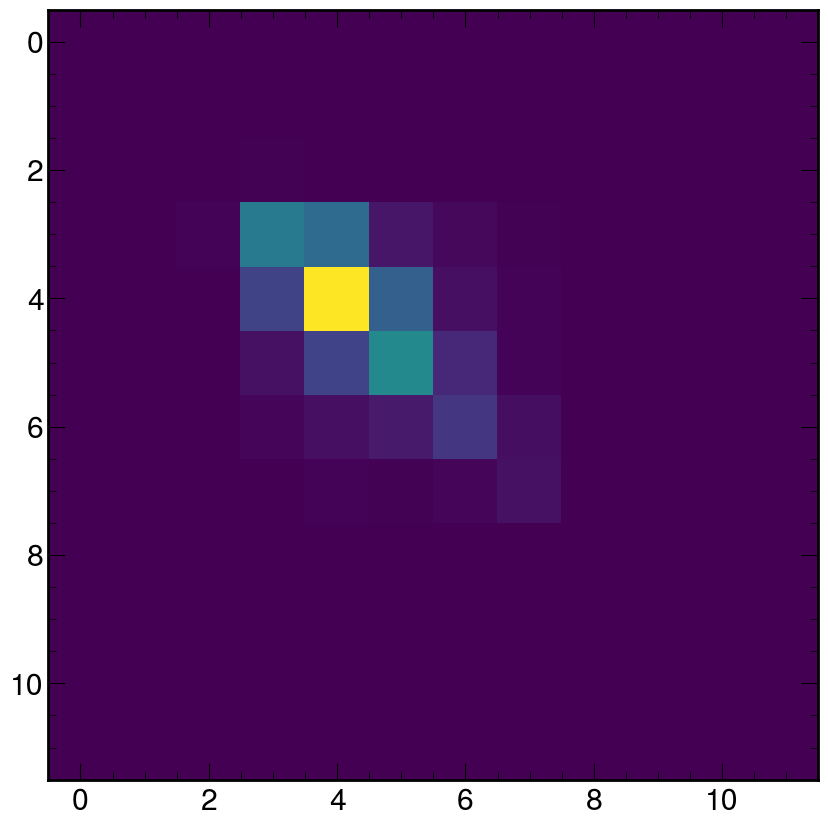

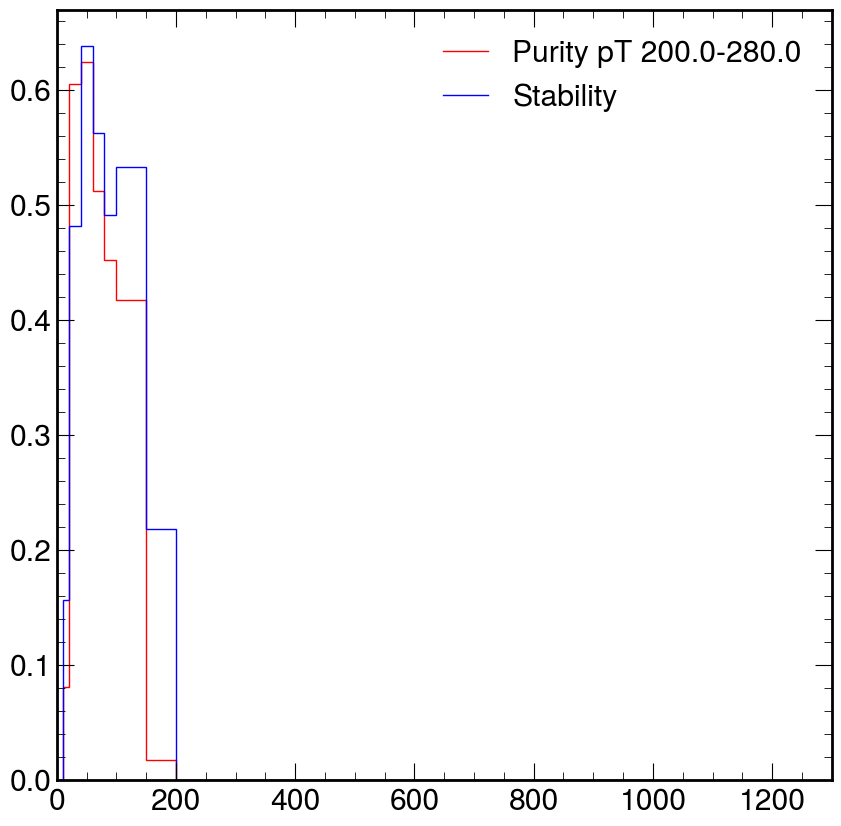

1
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


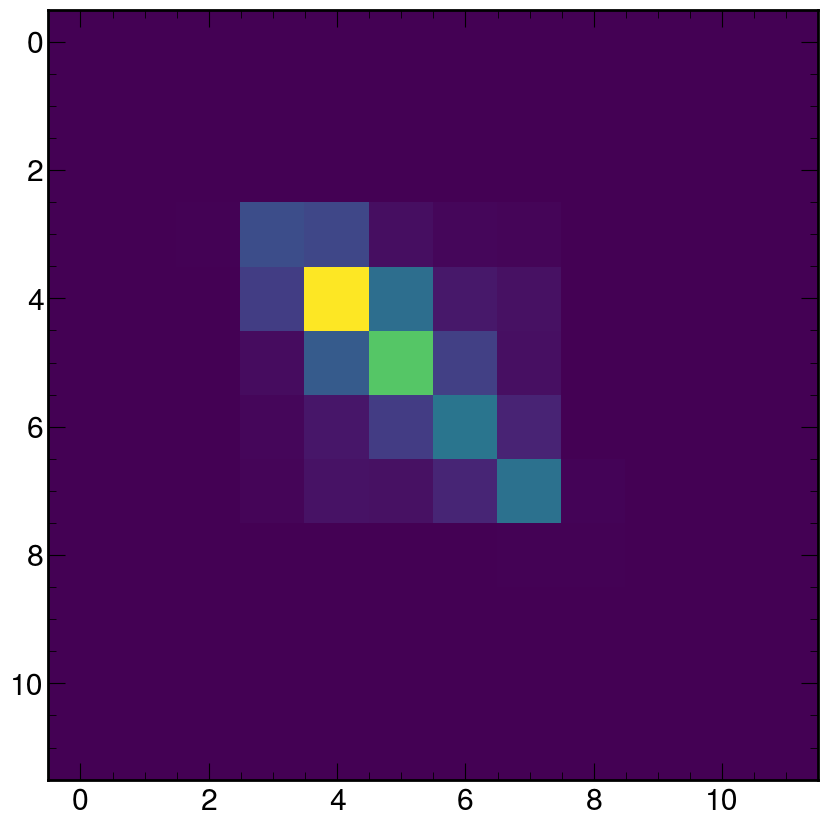

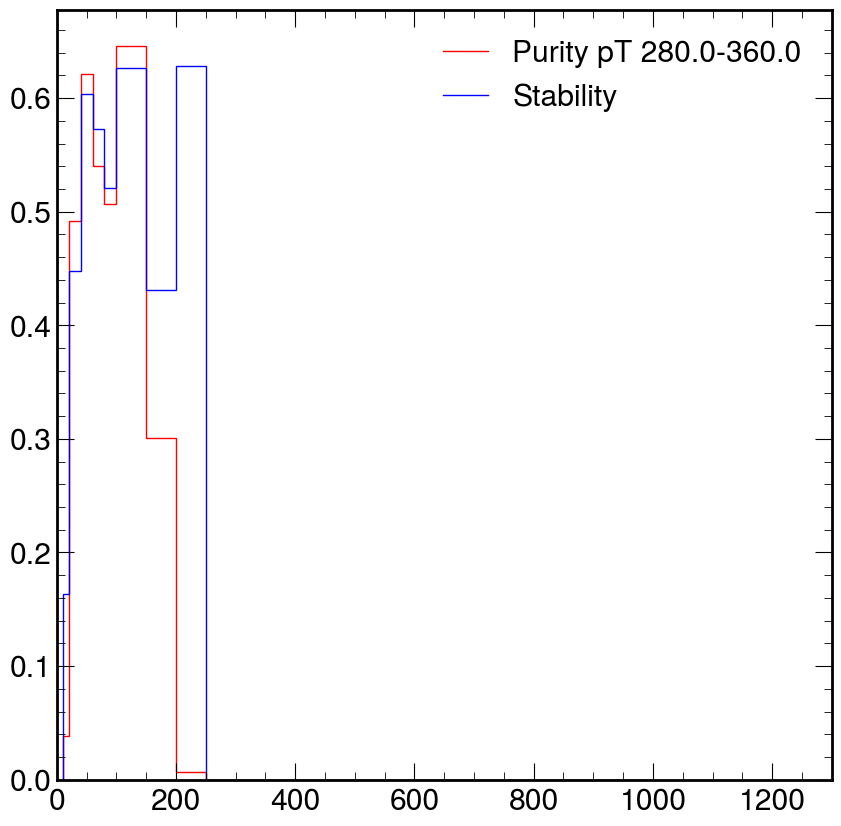

2
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


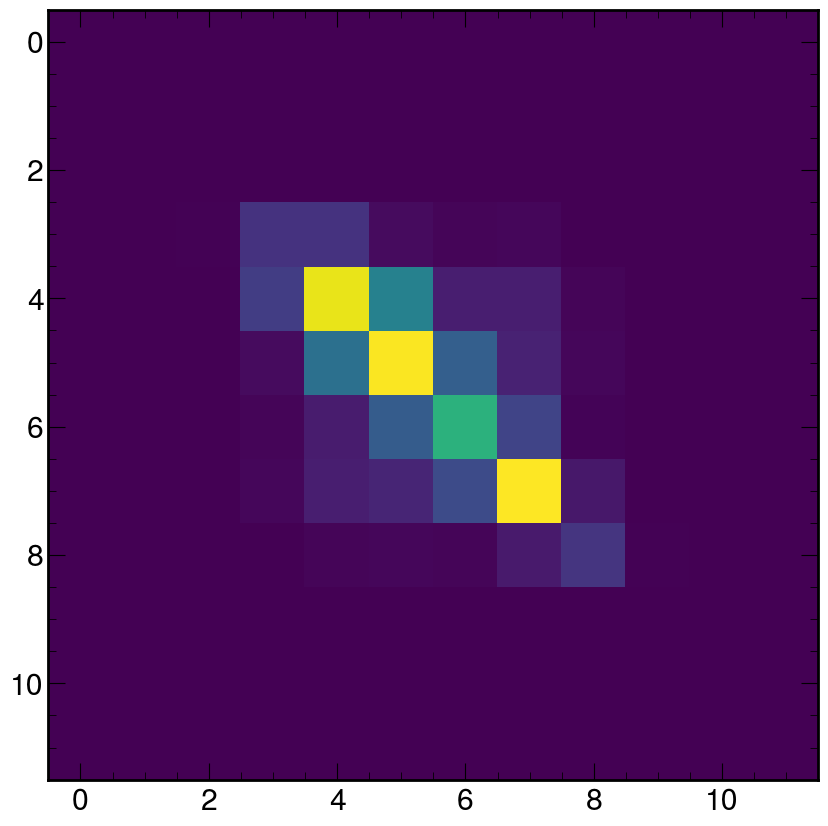

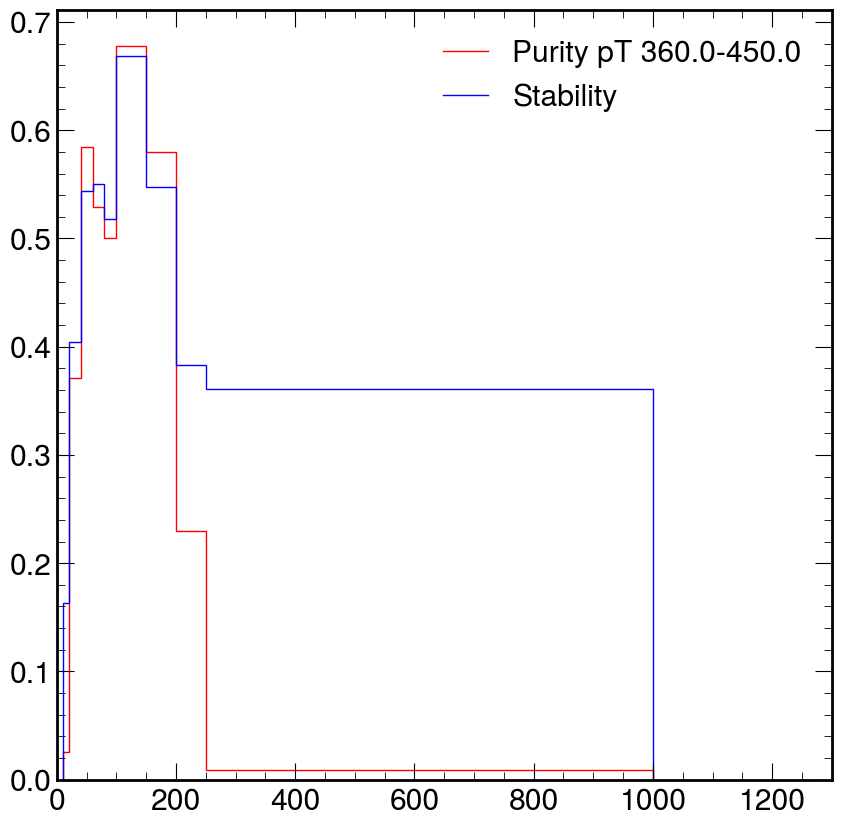

3
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


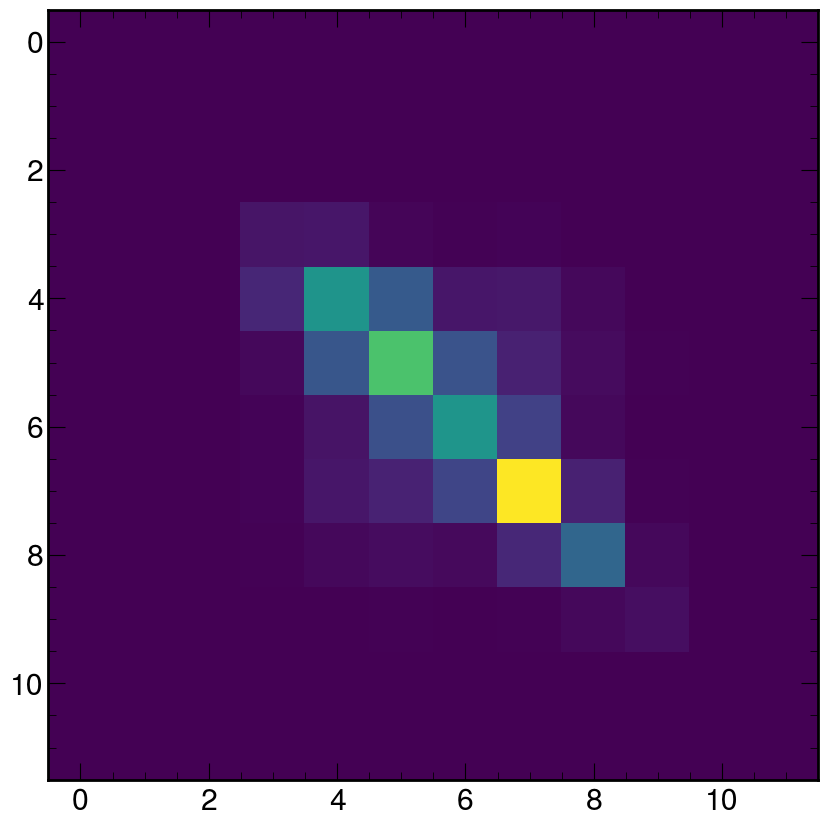

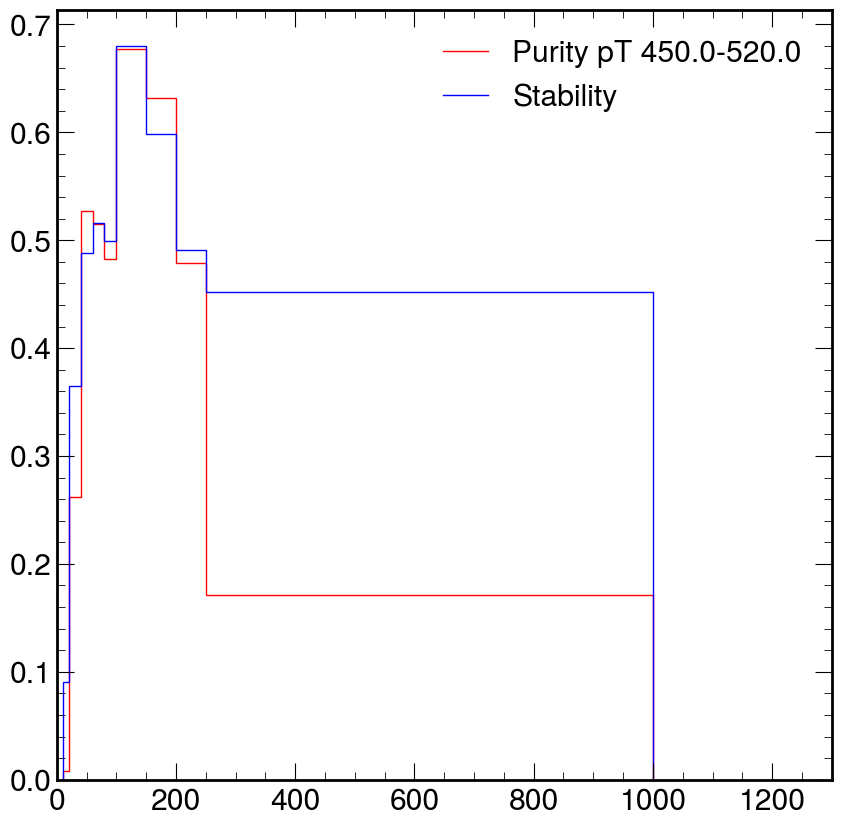

4
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


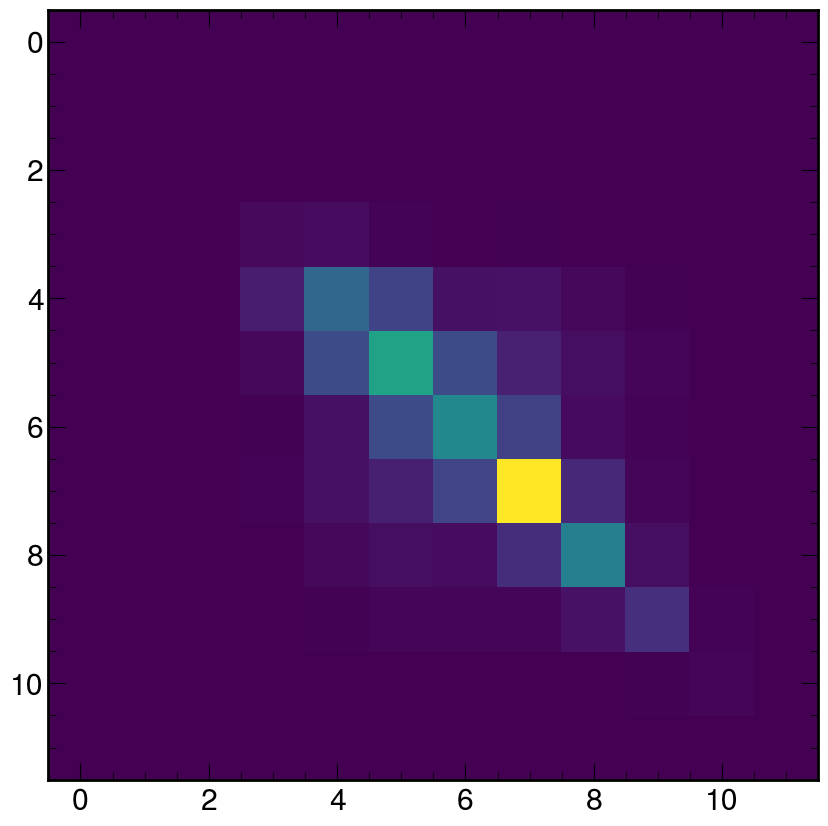

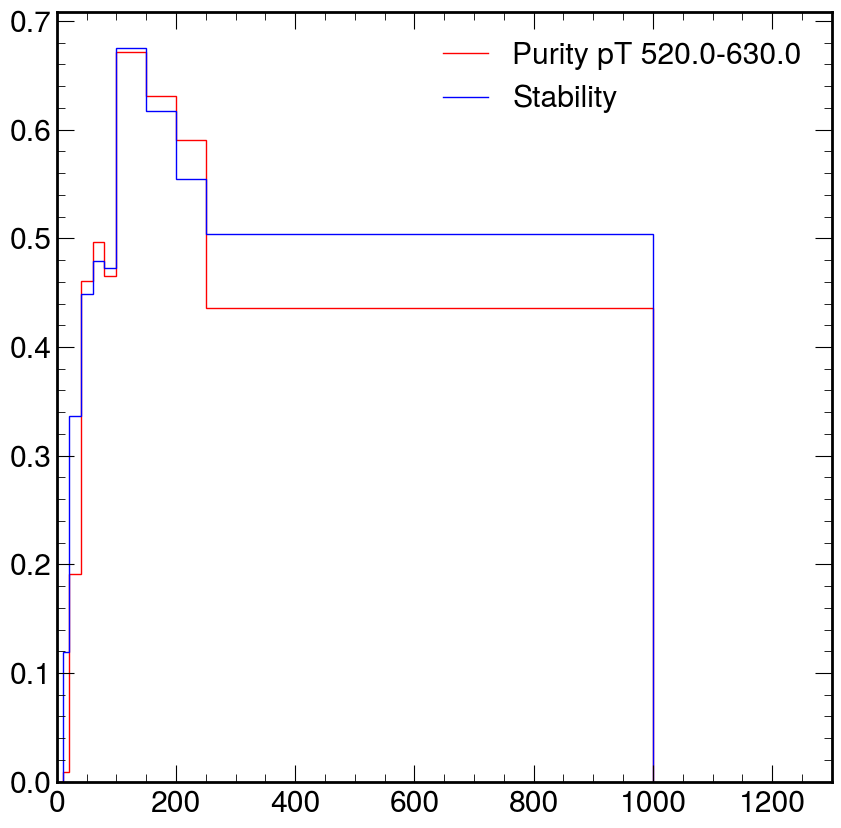

5
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


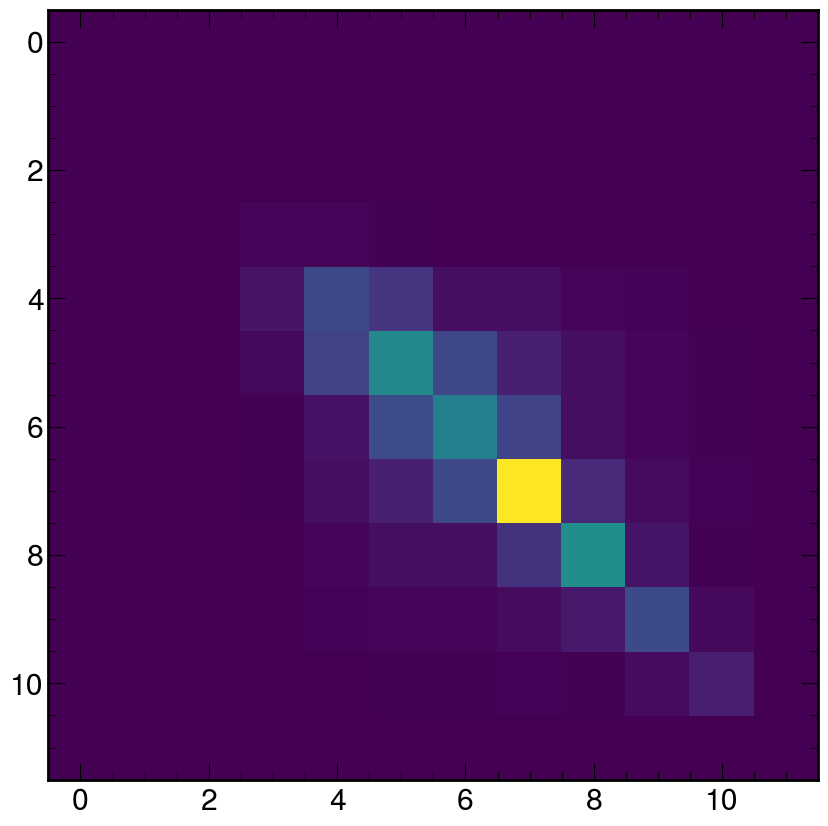

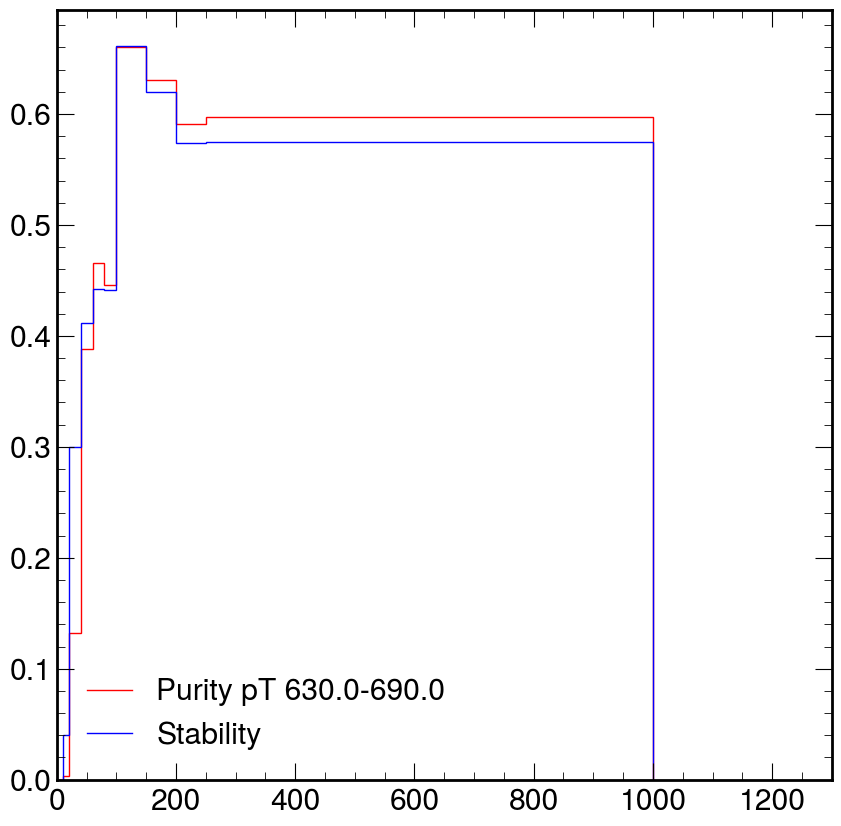

6
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


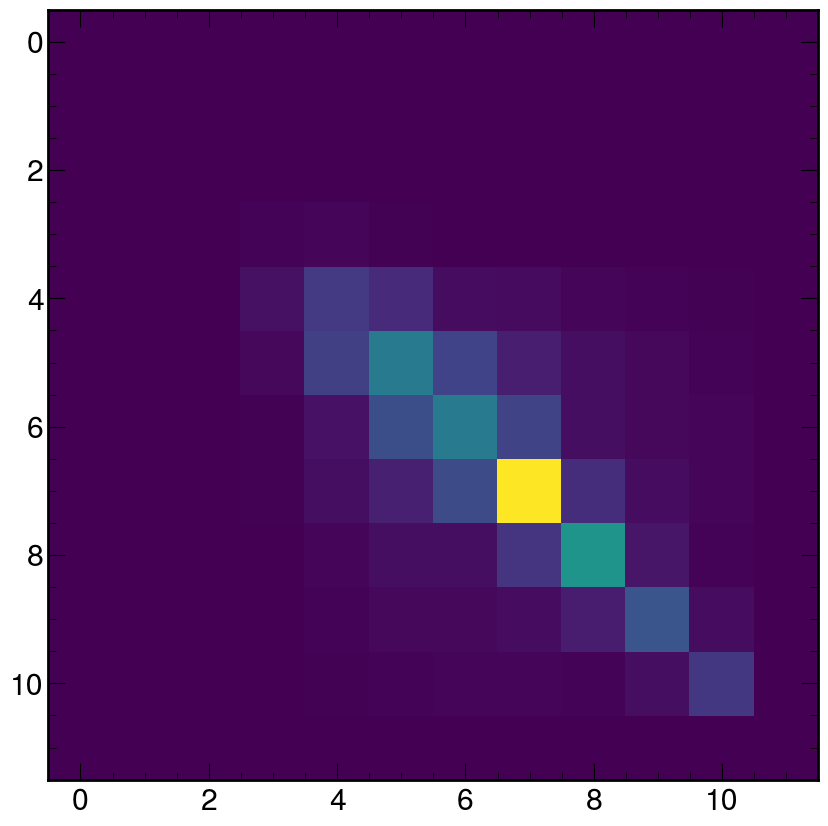

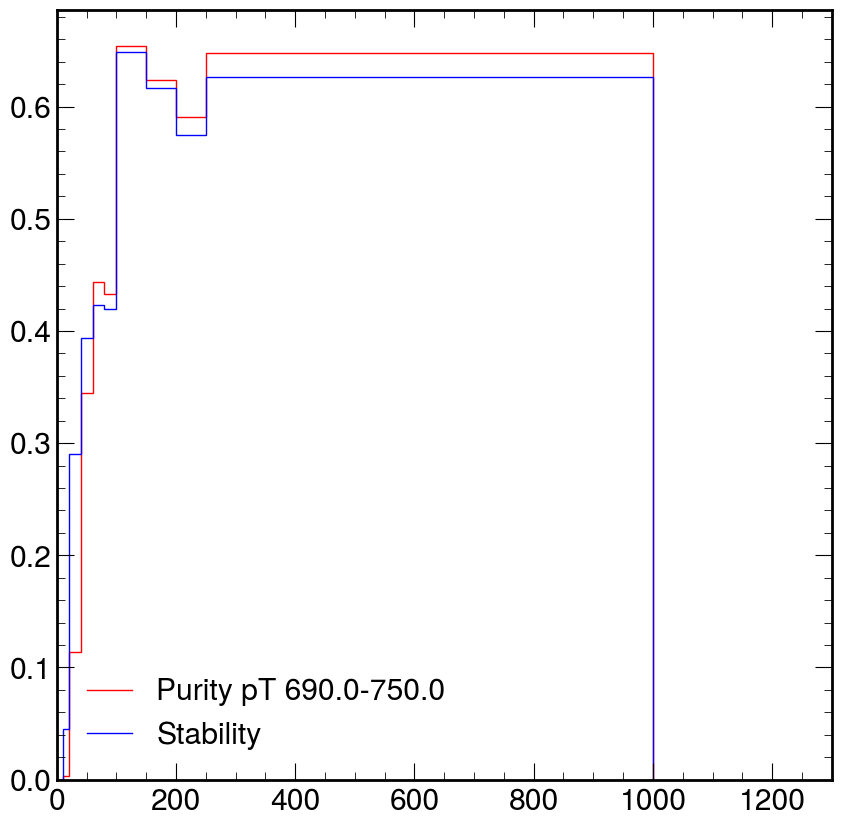

7
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


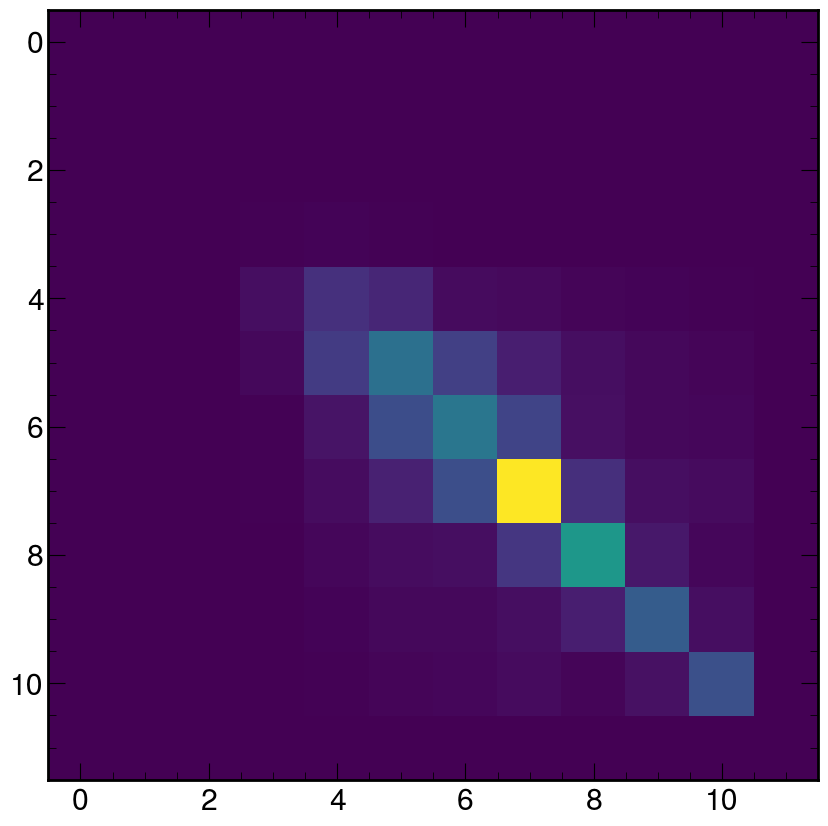

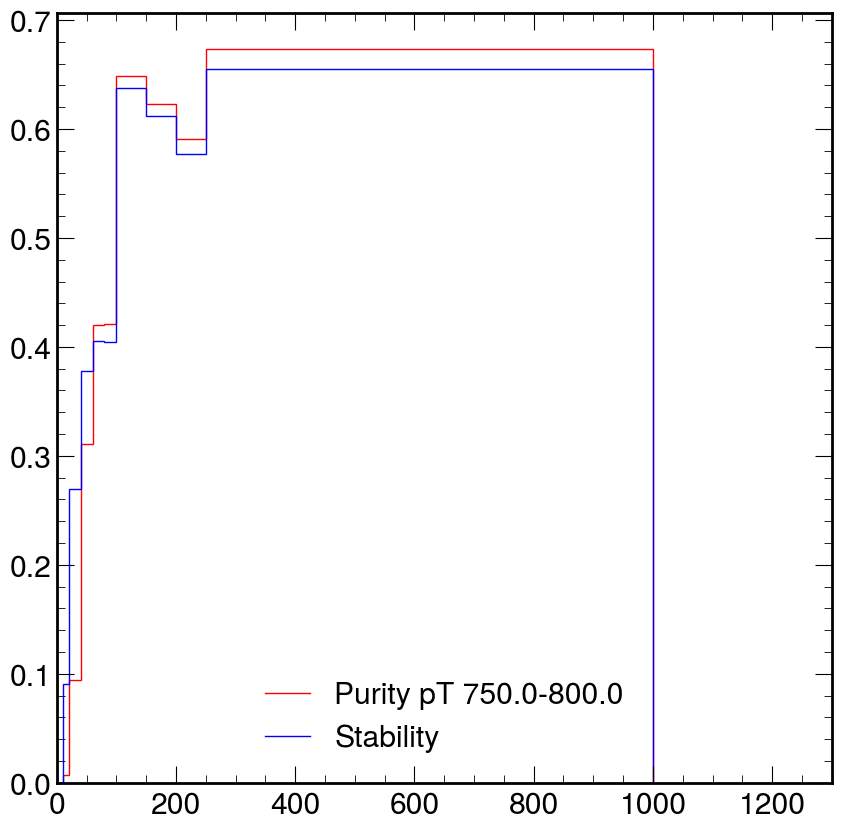

8
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


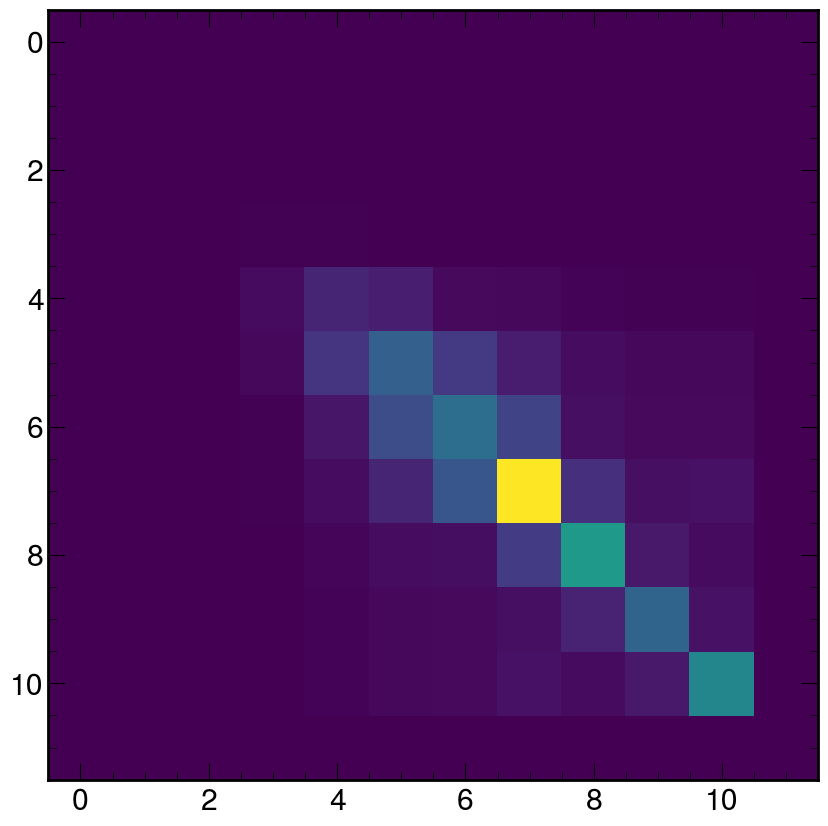

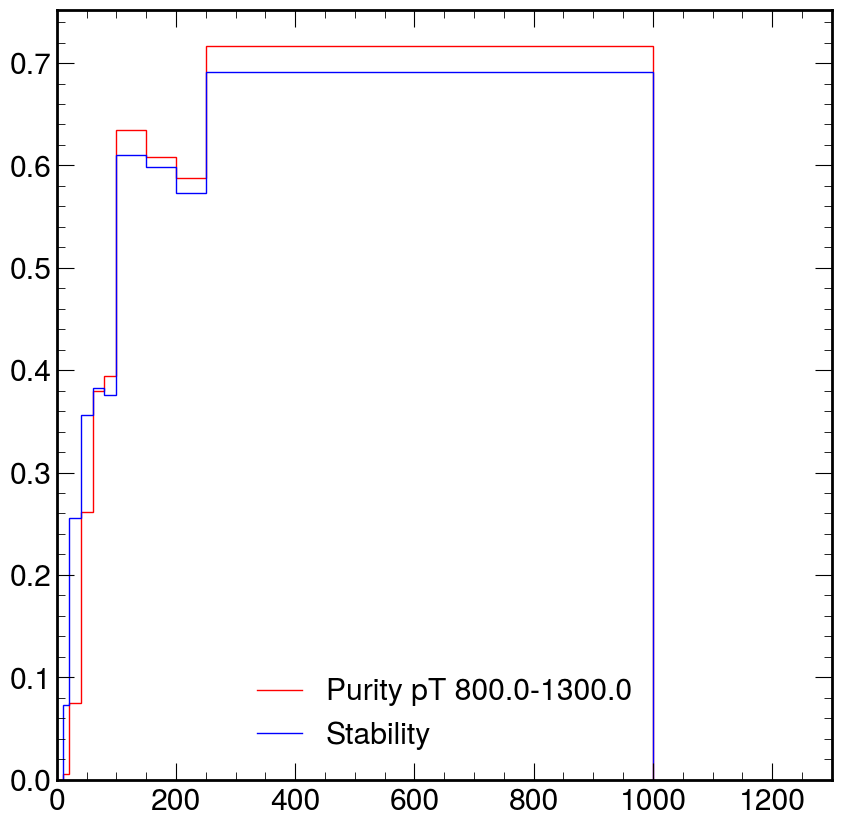

9
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


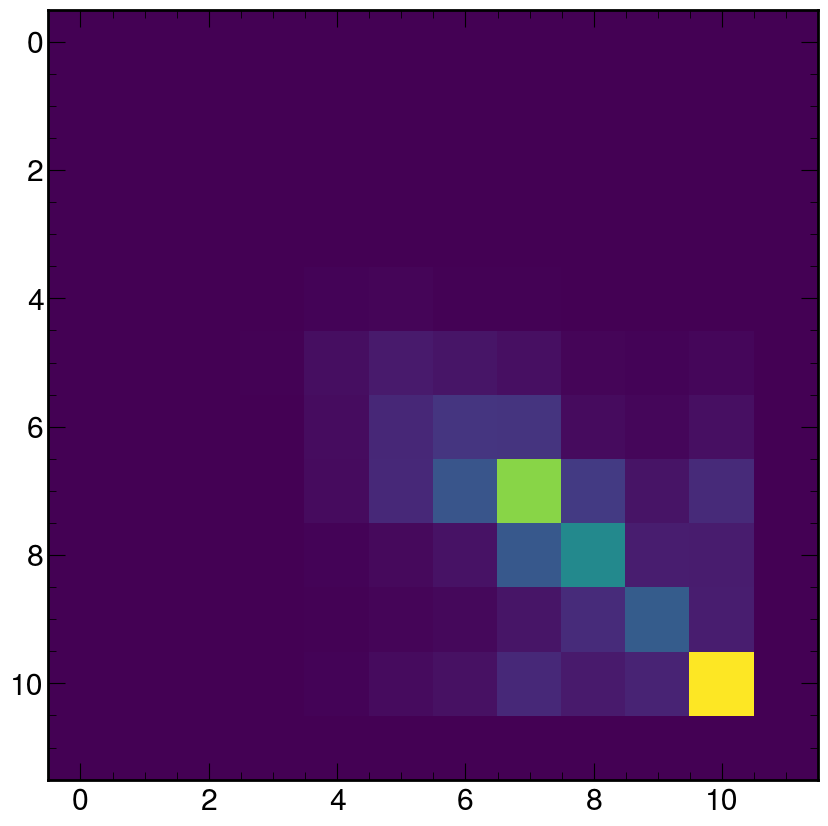

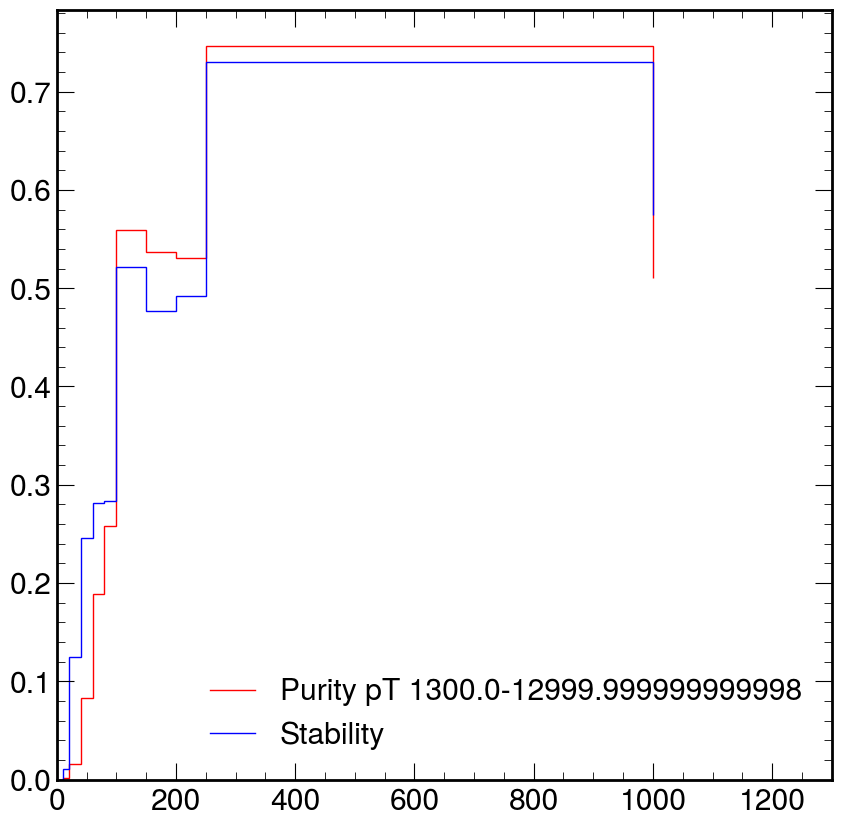

In [72]:
#### Get 1D pT response including underflow
for i in range(len(ptreco_edges)-3):
    print(i)
    mresponse_u, mreco_edges, mgen_edges = result['response_matrix_u'][{'syst':"nominal", "ptreco":i}].project("mreco", "mgen")[hist.rebin(2), :].to_numpy(flow=True)
    plt.imshow(mresponse_u)
    mreco_edges[0]=0.
    mgen_edges[0]=0.
    print(mgen_edges)
    m_diags = np.array([mresponse_u[j,j] for j in range(len(mgen_edges)-1)])
    print(pt_diags)
    mgen_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i}].project("mgen").values(flow=True)
    mreco_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i}].project("mreco")[hist.rebin(2)].values(flow=True)
    purity_vals = np.divide(m_diags, mgen_tot_vals, out=np.zeros_like(mgen_tot_vals), where=mgen_tot_vals!=0)
    stability_vals = np.divide(m_diags, mreco_tot_vals, out=np.zeros_like(mreco_tot_vals), where=mreco_tot_vals!=0)
    fig, ax = plt.subplots()
    hep.histplot(purity_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax,color = 'Red', linewidth=1,
                     label="Purity pT reco "+str(ptreco_edges[i+1])+"-"+str(ptreco_edges[i+2]))
    print(ptgen_hist[hist.underflow])
    hep.histplot(stability_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax, color = 'Blue', linewidth=1,
                     label="Stability")
    ax.set_xlim(0,1300)
    ax.legend()
    # fig, ax = plt.subplots()
    # hep.histplot(mcvals, stack=False, histtype='step',
    #                  ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
    #                  label=channel + " MC")
    plt.show()

In [76]:
print(mgen_edges)
print(mgen_edges[1:]-mgen_edges[:-1])
mgen_edges_new = np.array([ 0.,0.,20.,80.,80.,100.,150., 200.,250.,450., 1000., np.inf])
print(mgen_edges_new[1:]-mgen_edges_new[:-1])

[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[  0.  10.  10.  20.  20.  20.  20.  50.  50.  50. 750.  inf]
[  0.  10.  10.  20.  20.  20.  20.  50.  50.  50. 750.  inf]


0
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


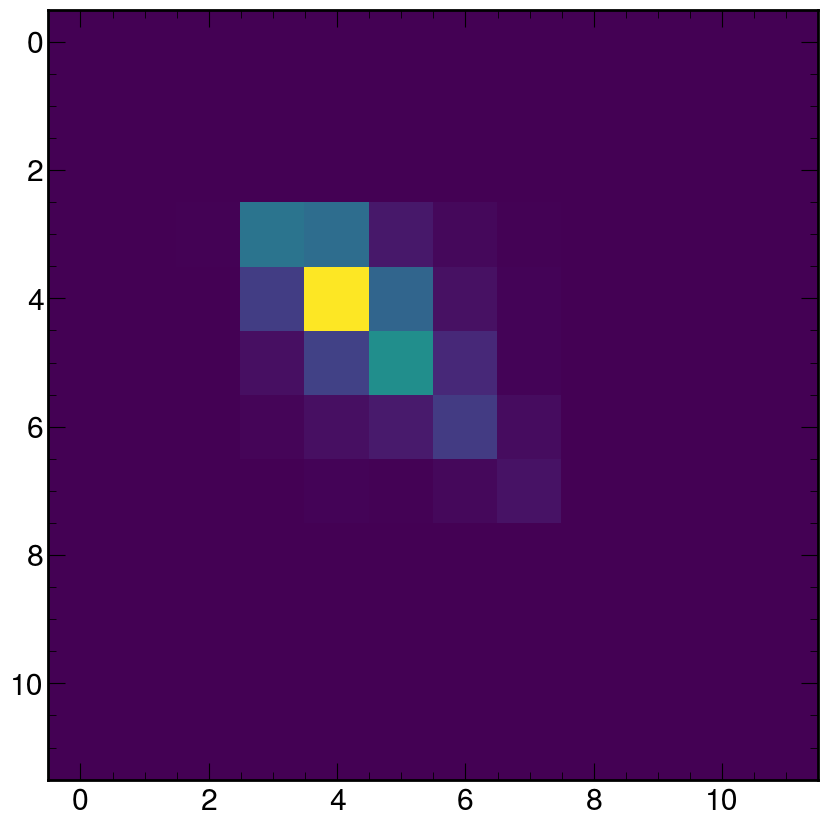

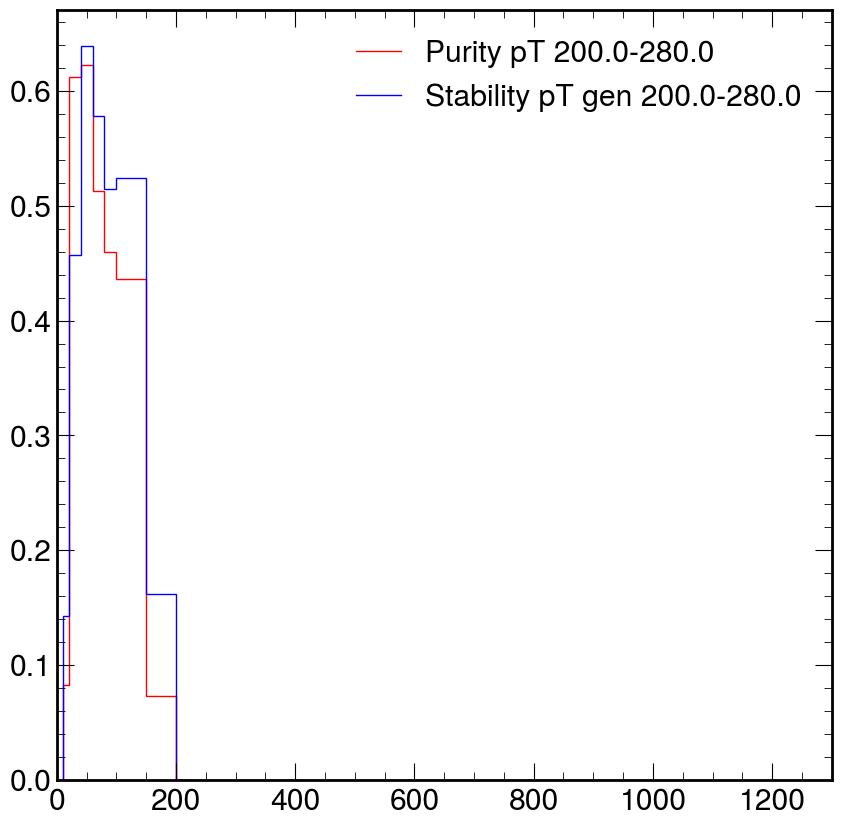

1
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


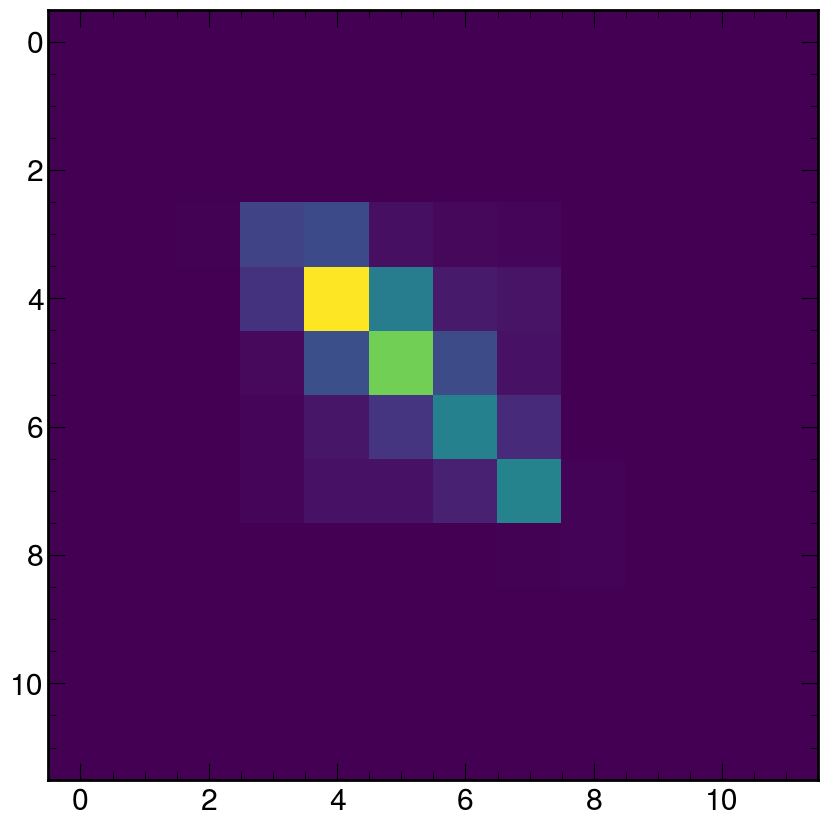

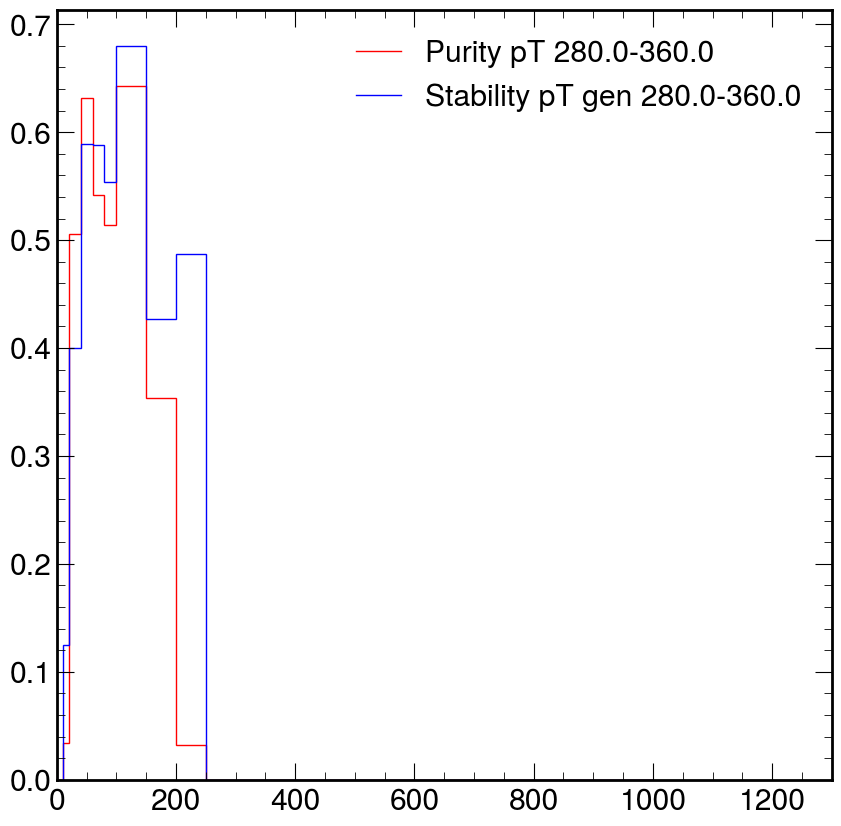

2
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


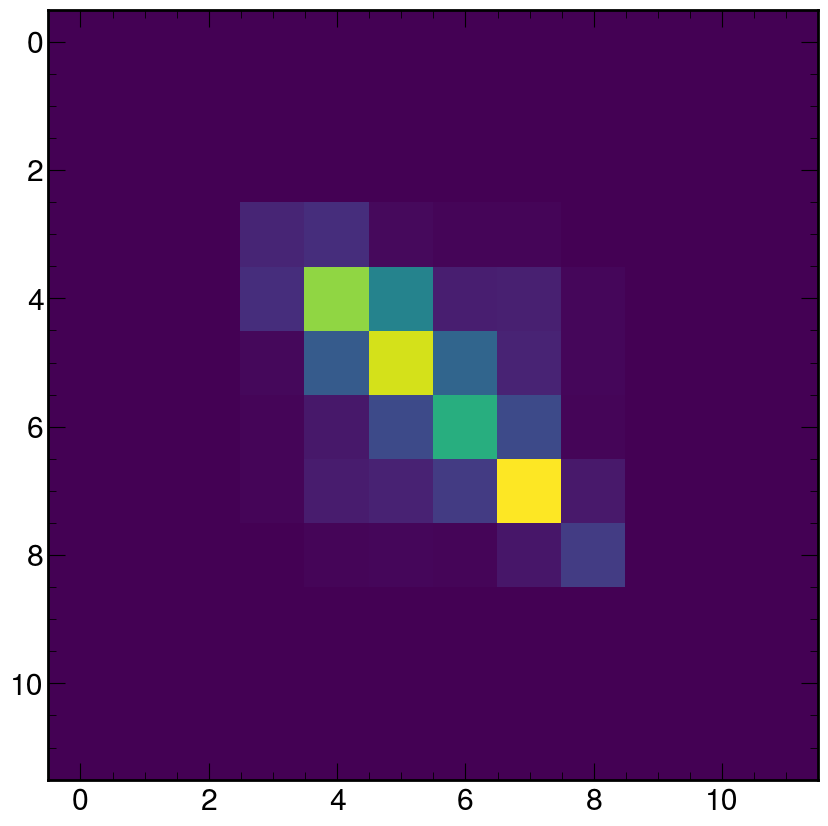

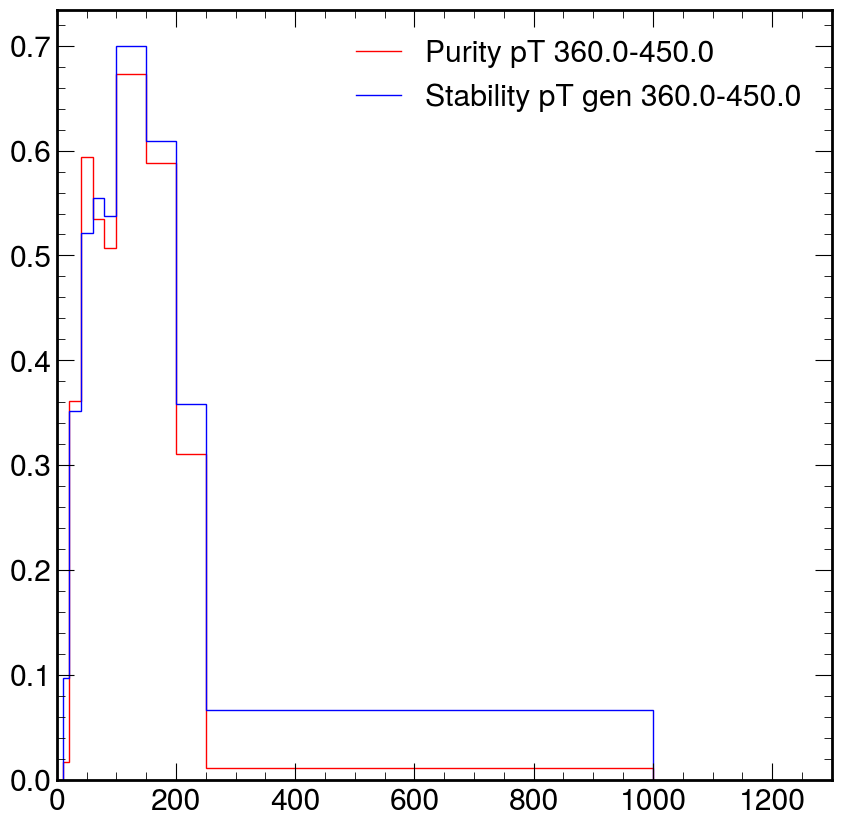

3
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


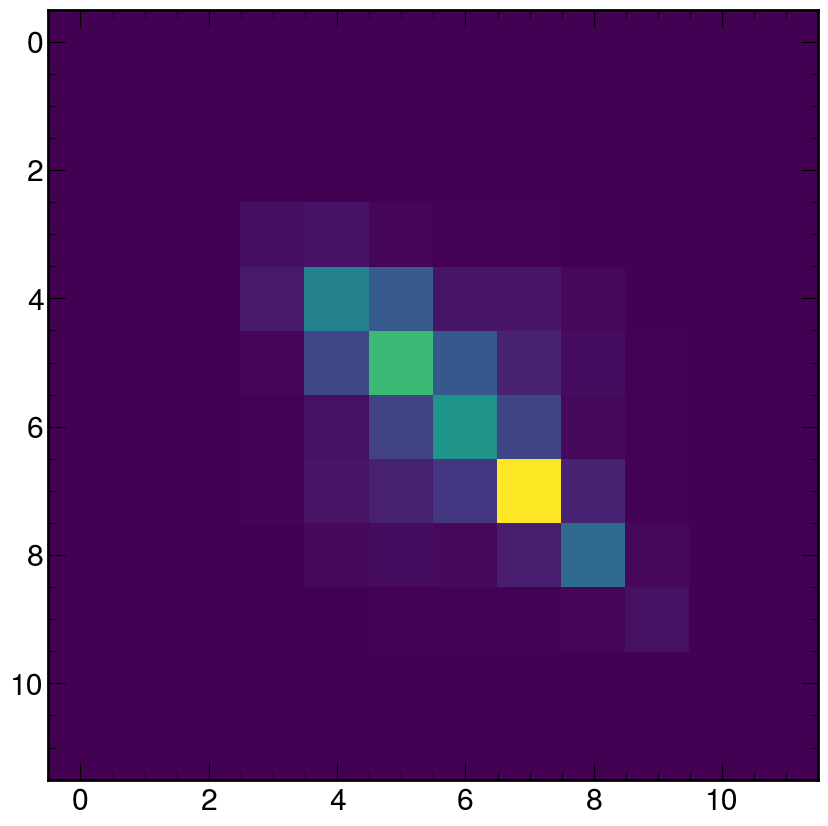

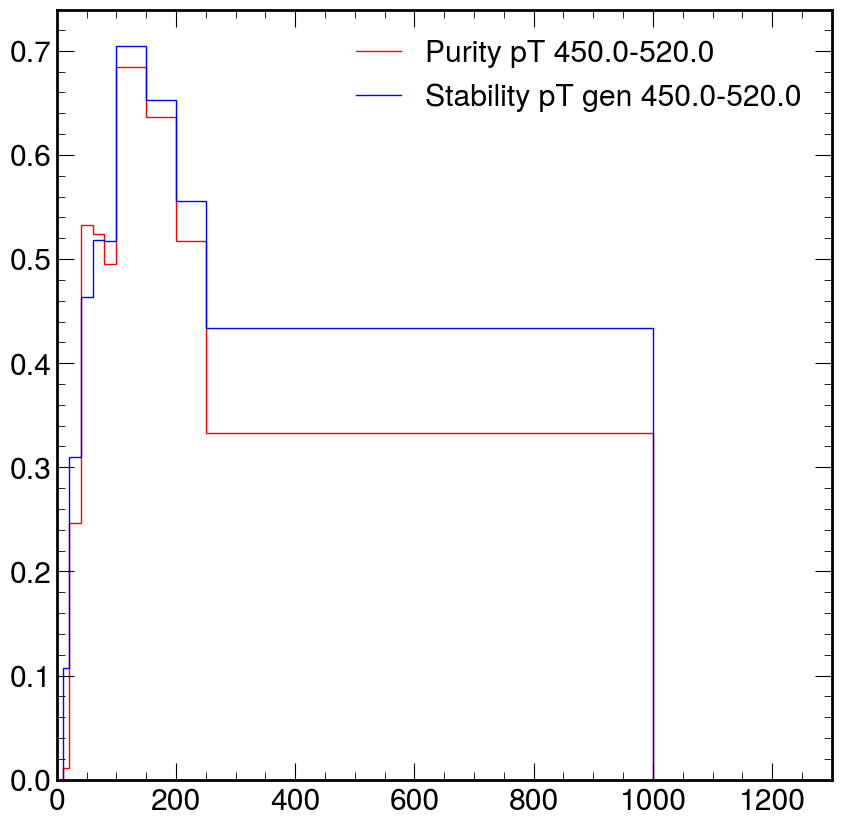

4
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


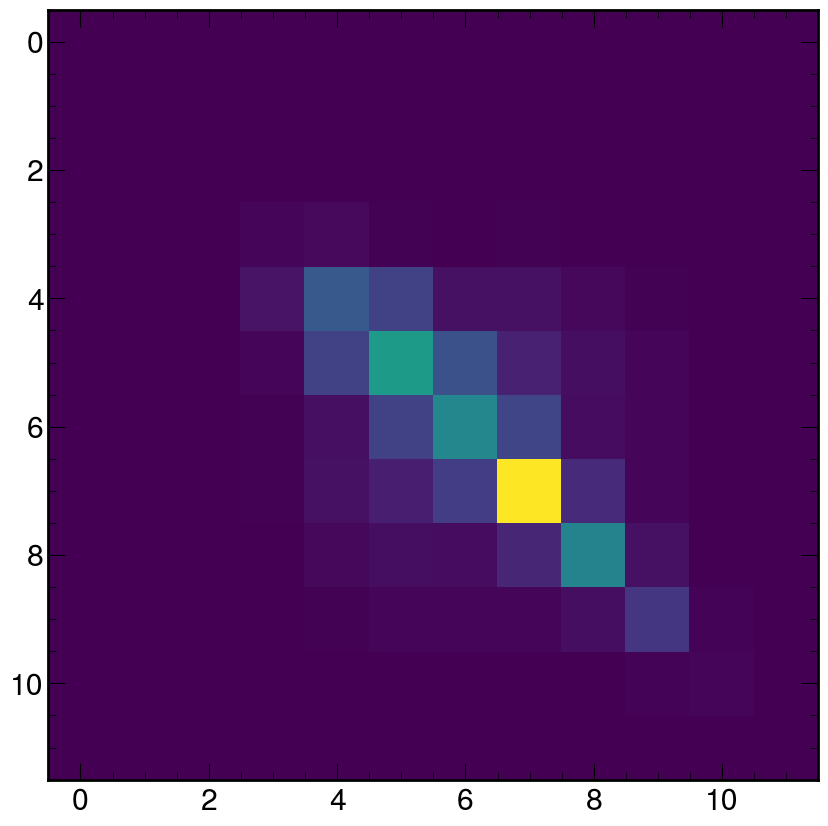

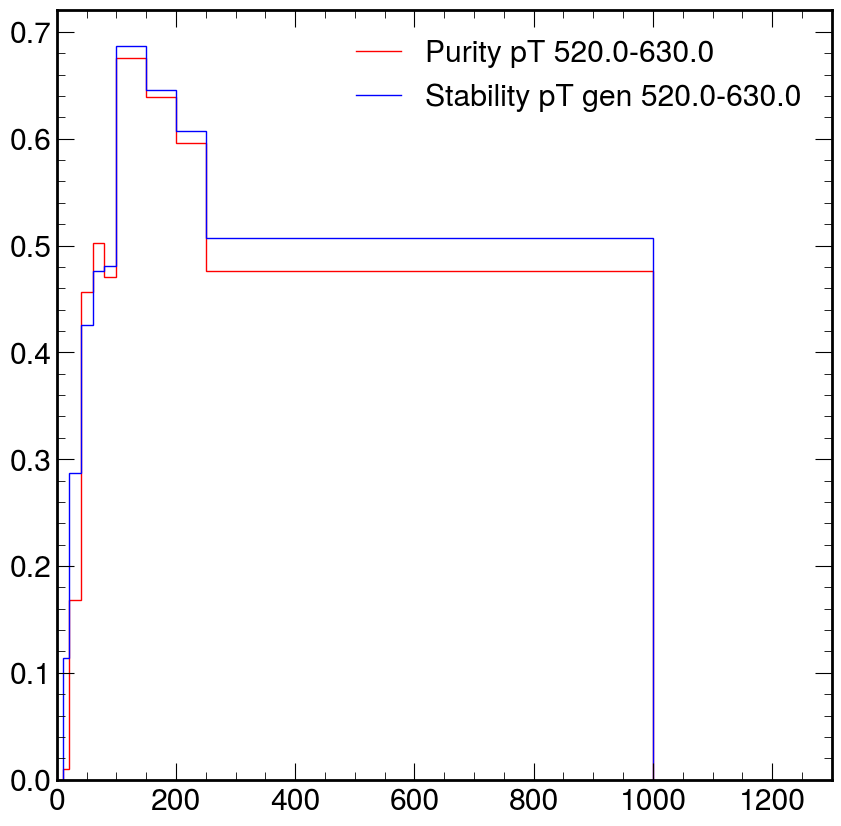

5
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


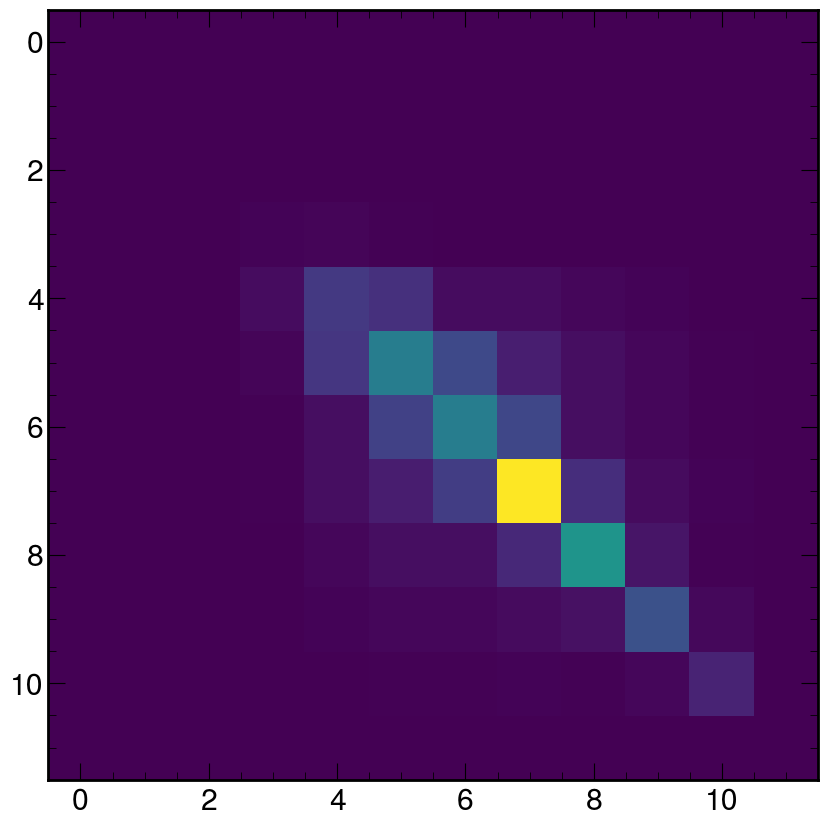

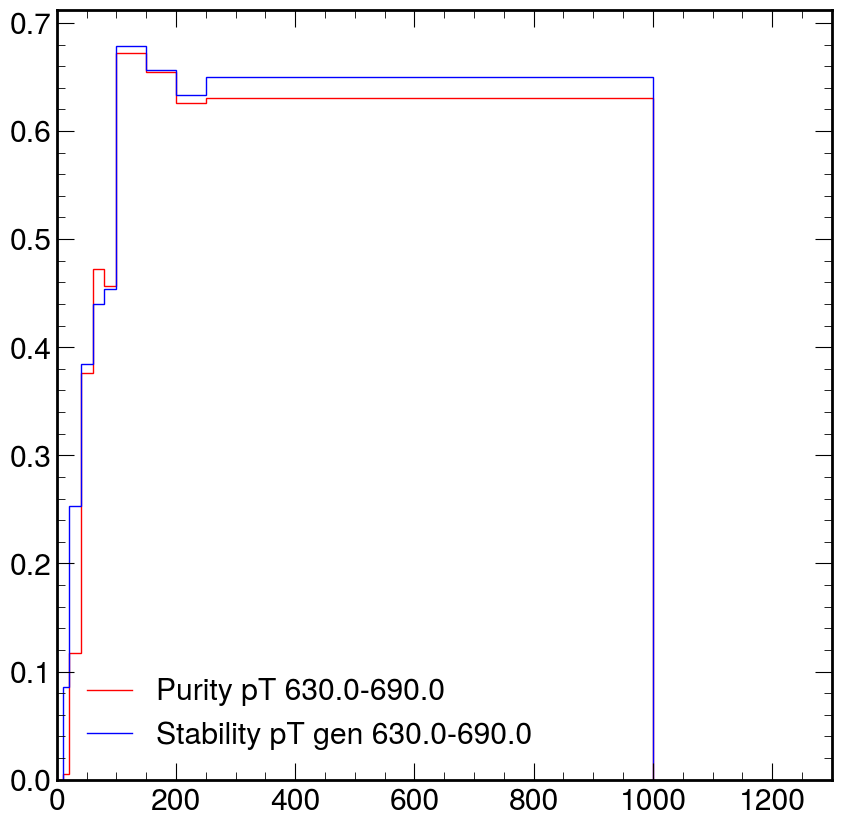

6
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


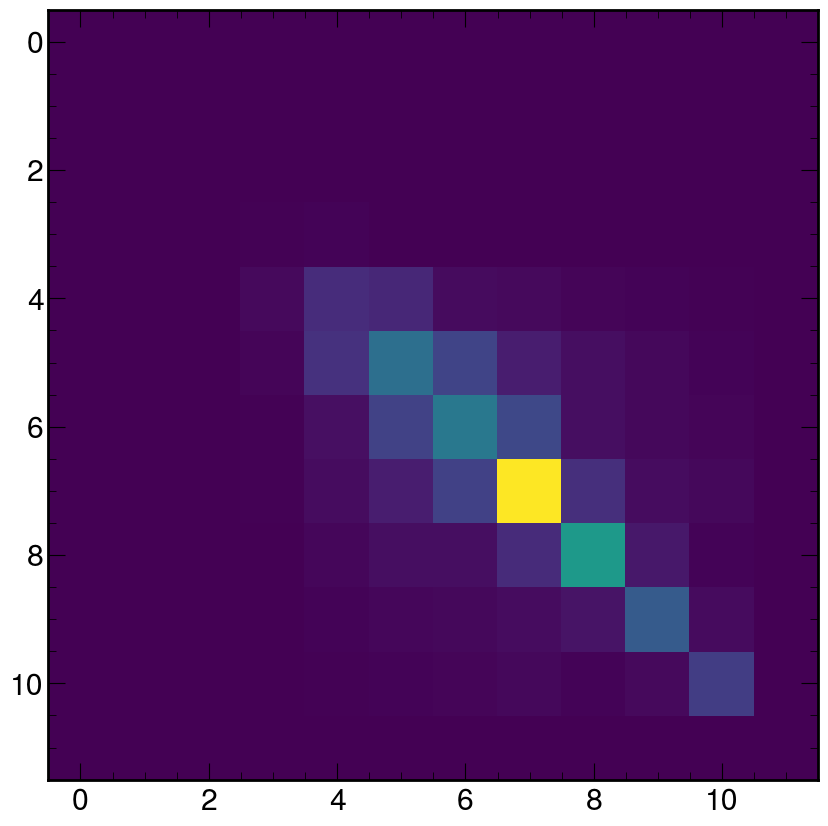

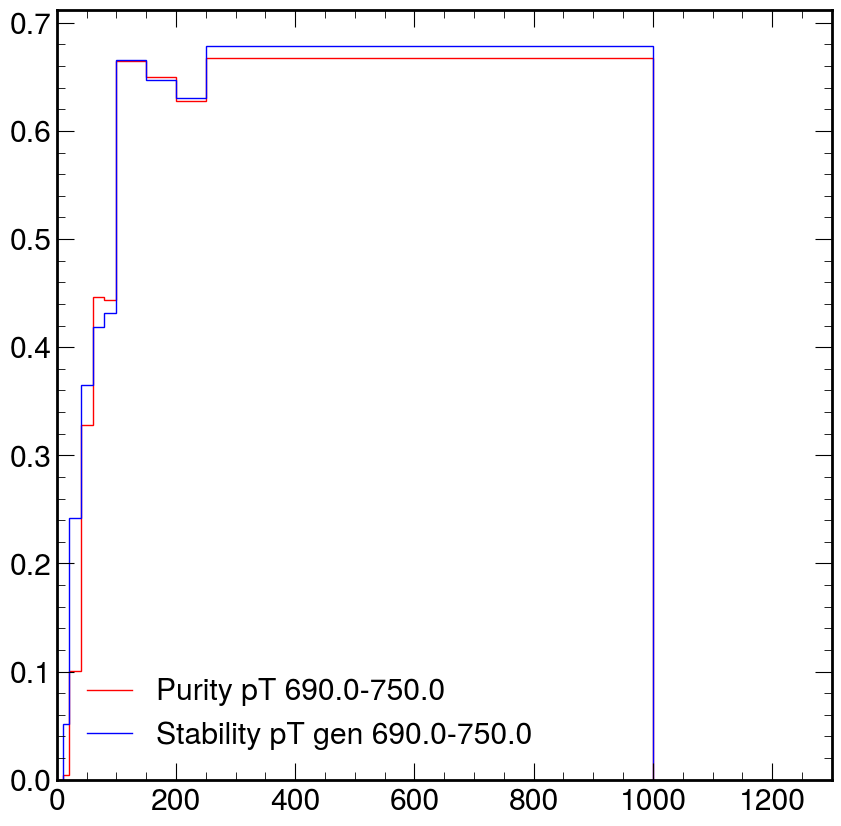

7
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


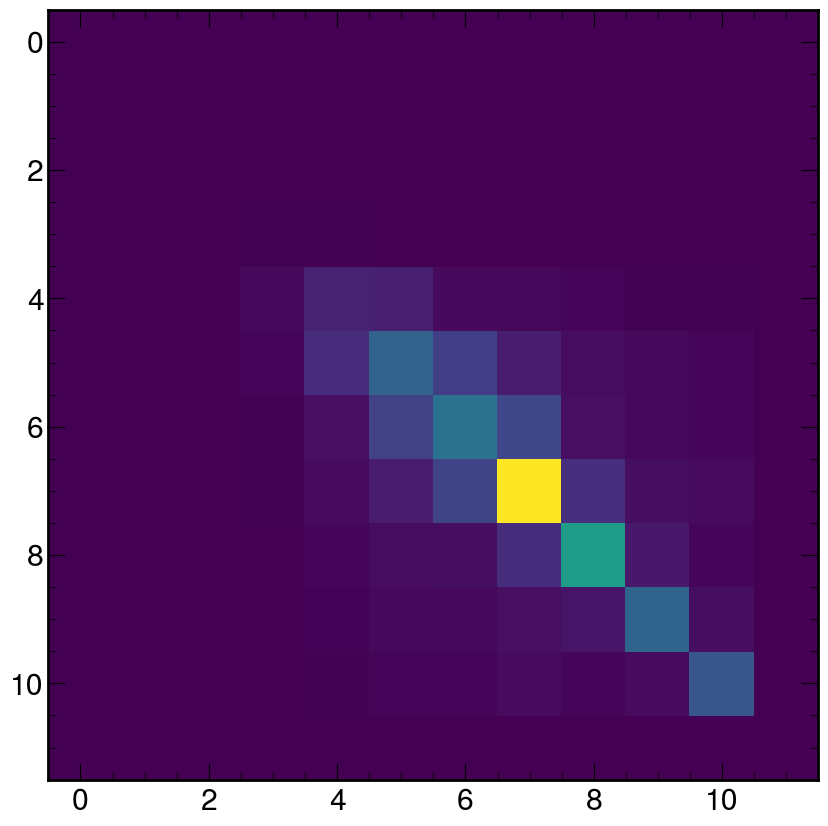

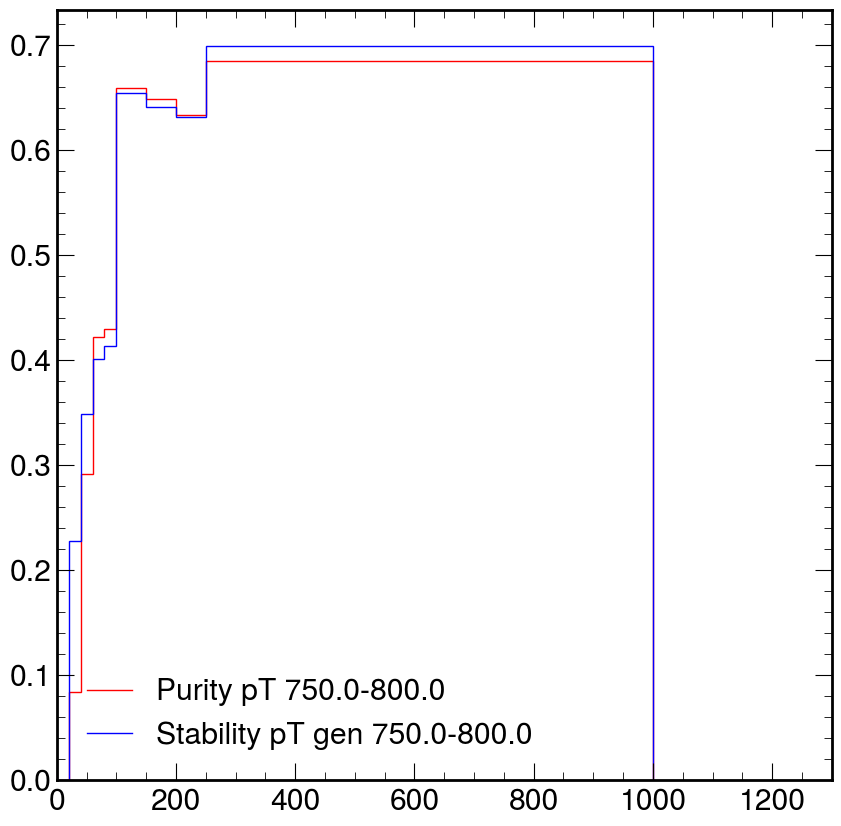

8
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


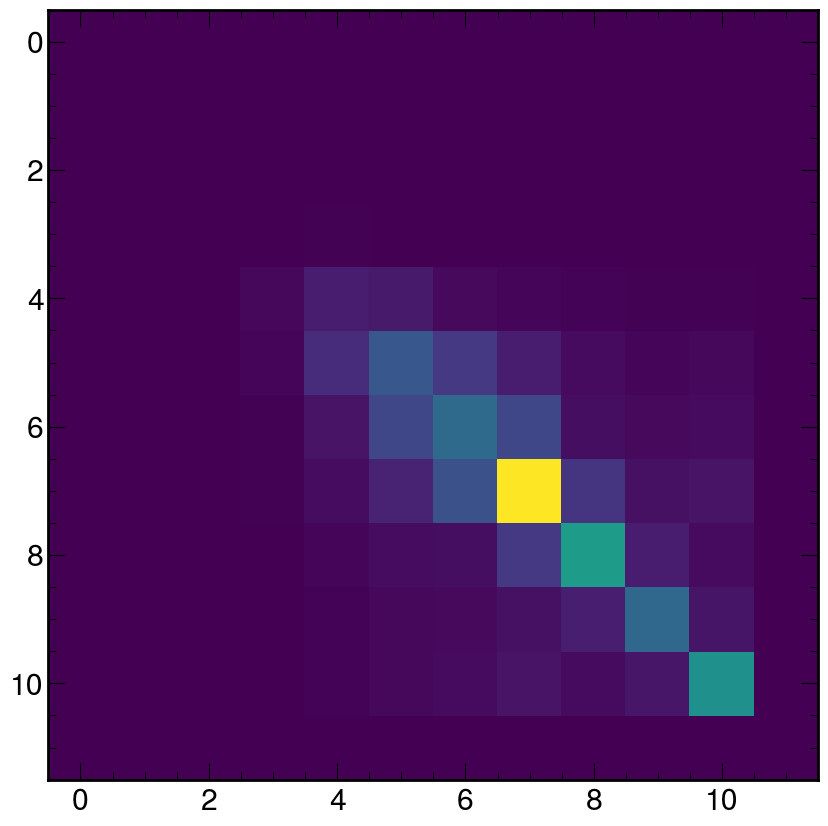

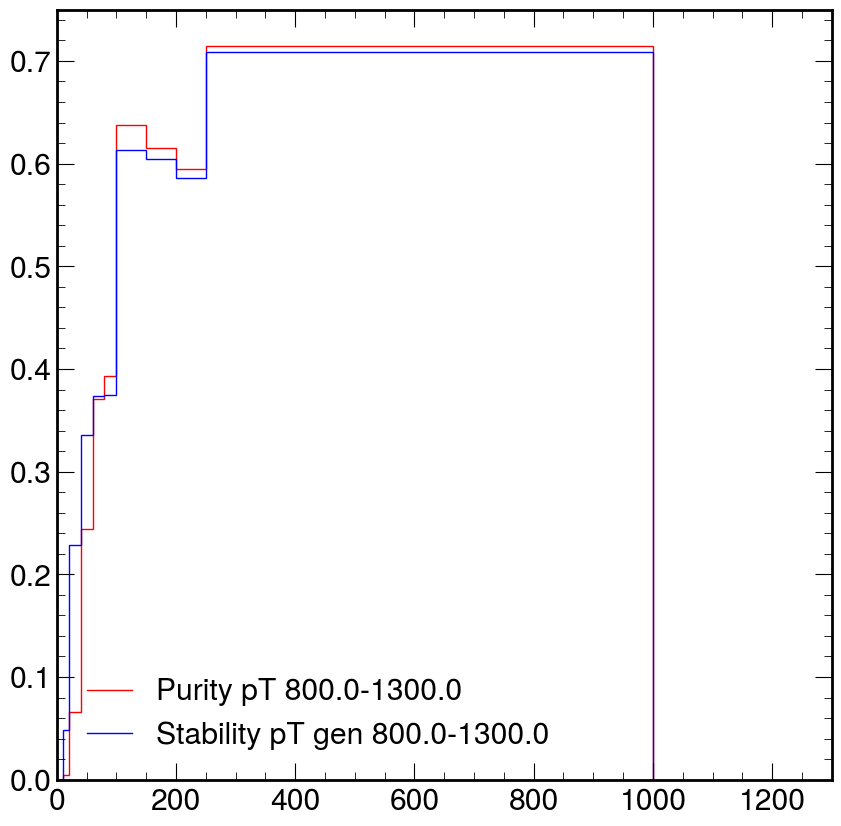

9
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


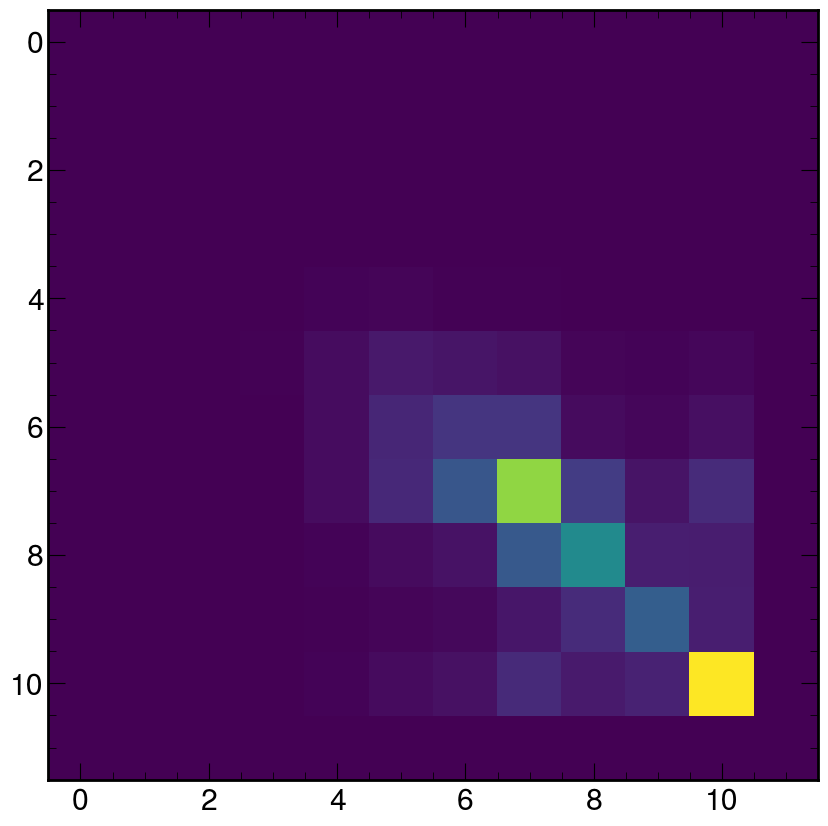

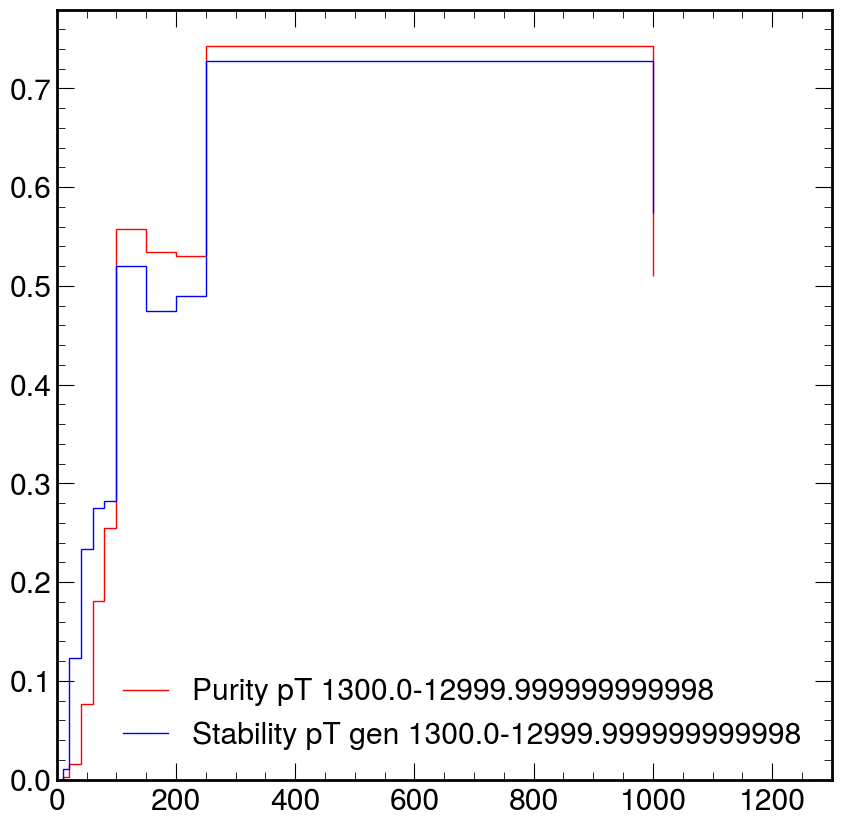

In [84]:
#### Get 1D pT response including underflow
for i in range(len(ptreco_edges)-3):
    print(i)
    mresponse_u, mreco_edges, mgen_edges = result['response_matrix_u'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mreco", "mgen")[hist.rebin(2), :].to_numpy(flow=True)
    plt.imshow(mresponse_u)
    mreco_edges[0]=0.
    mgen_edges[0]=0.
    print(mgen_edges)
    m_diags = np.array([mresponse_u[j,j] for j in range(len(mgen_edges)-1)])
    print(pt_diags)
    mgen_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mgen").values(flow=True)
    mreco_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mreco")[hist.rebin(2)].values(flow=True)
    purity_vals = np.divide(m_diags, mgen_tot_vals, out=np.zeros_like(mgen_tot_vals), where=mgen_tot_vals!=0)
    stability_vals = np.divide(m_diags, mreco_tot_vals, out=np.zeros_like(mreco_tot_vals), where=mreco_tot_vals!=0)
    fig, ax = plt.subplots()
    hep.histplot(purity_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax,color = 'Red', linewidth=1,
                     label="Purity pT "+str(ptreco_edges[i+1])+"-"+str(ptreco_edges[i+2]))
    print(ptgen_hist[hist.underflow])
    hep.histplot(stability_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax, color = 'Blue', linewidth=1,
                     label="Stability pT gen "+str(ptgen_edges[i+1])+"-"+str(ptgen_edges[i+2]))
    ax.set_xlim(0,1300)
    ax.legend()
    # fig, ax = plt.subplots()
    # hep.histplot(mcvals, stack=False, histtype='step',
    #                  ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
    #                  label=channel + " MC")
    plt.show()

0
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


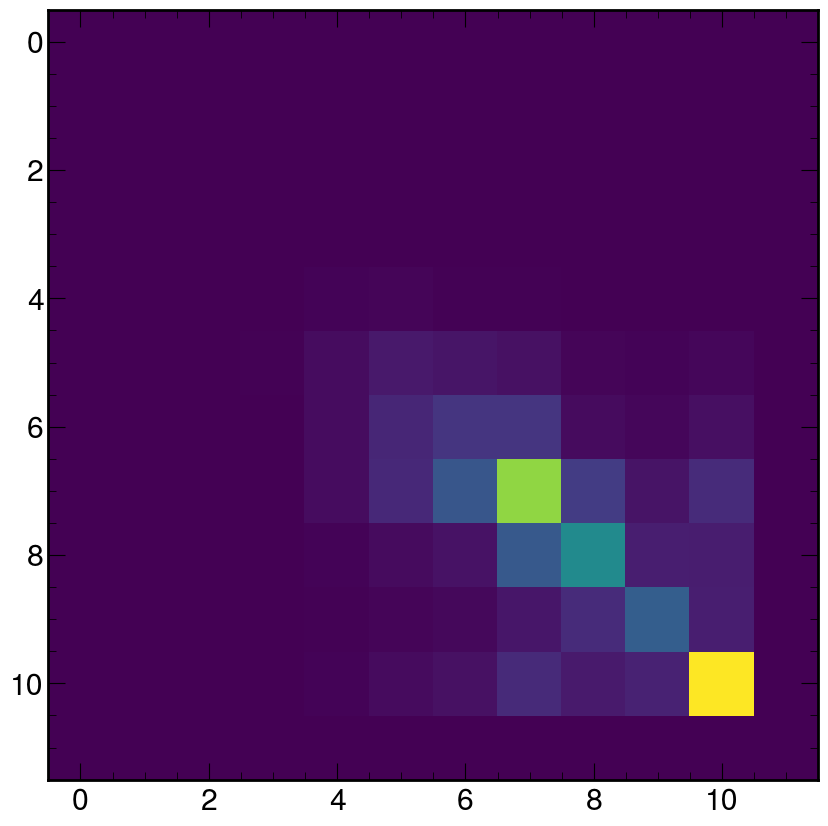

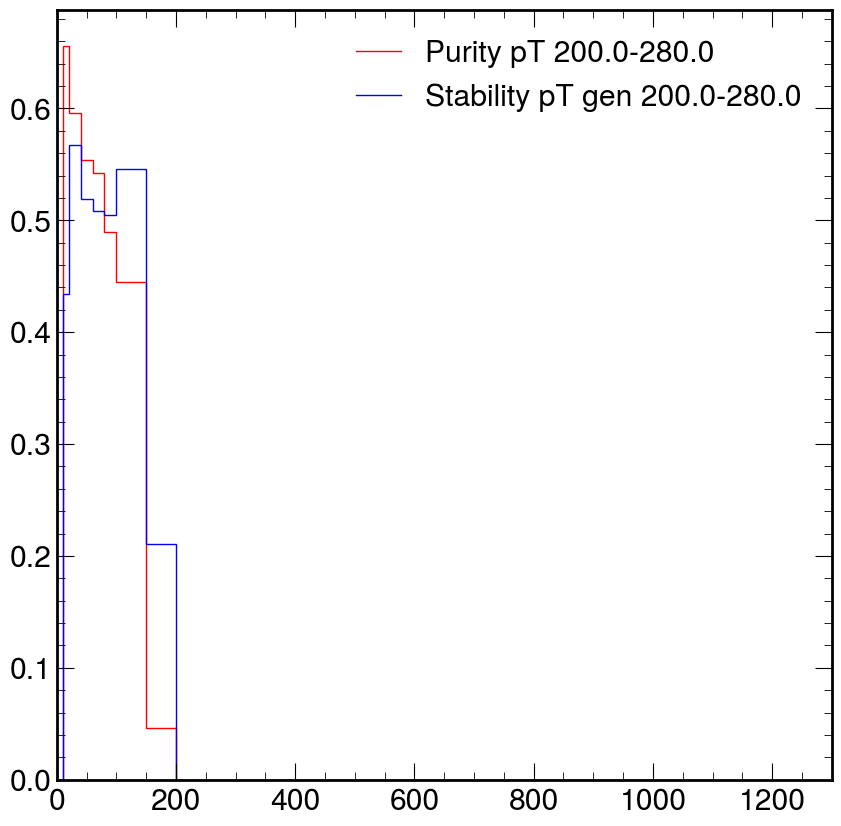

1
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


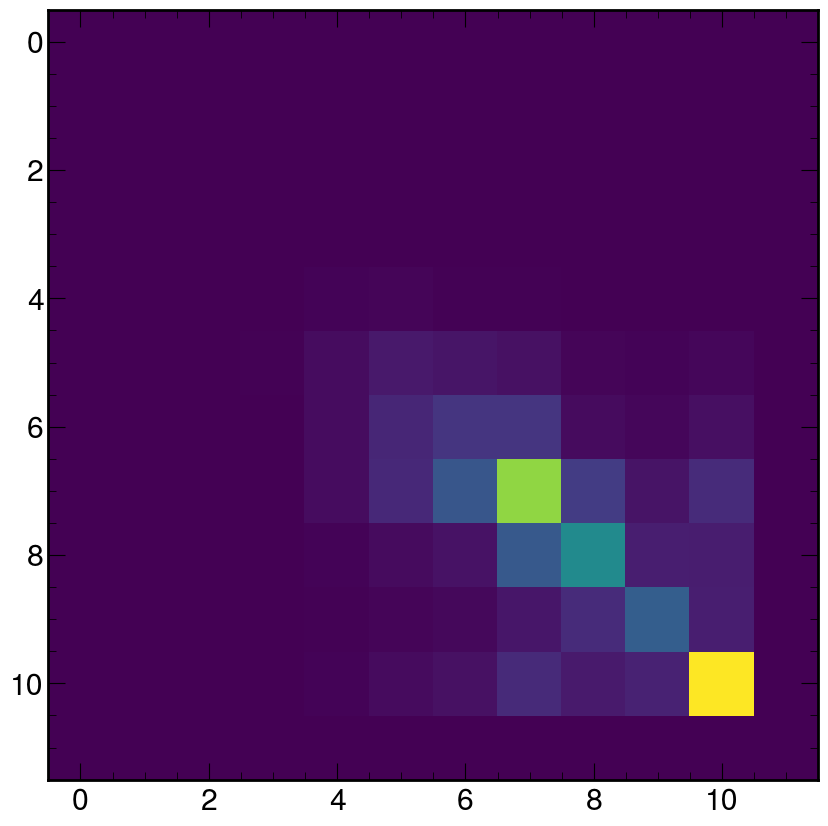

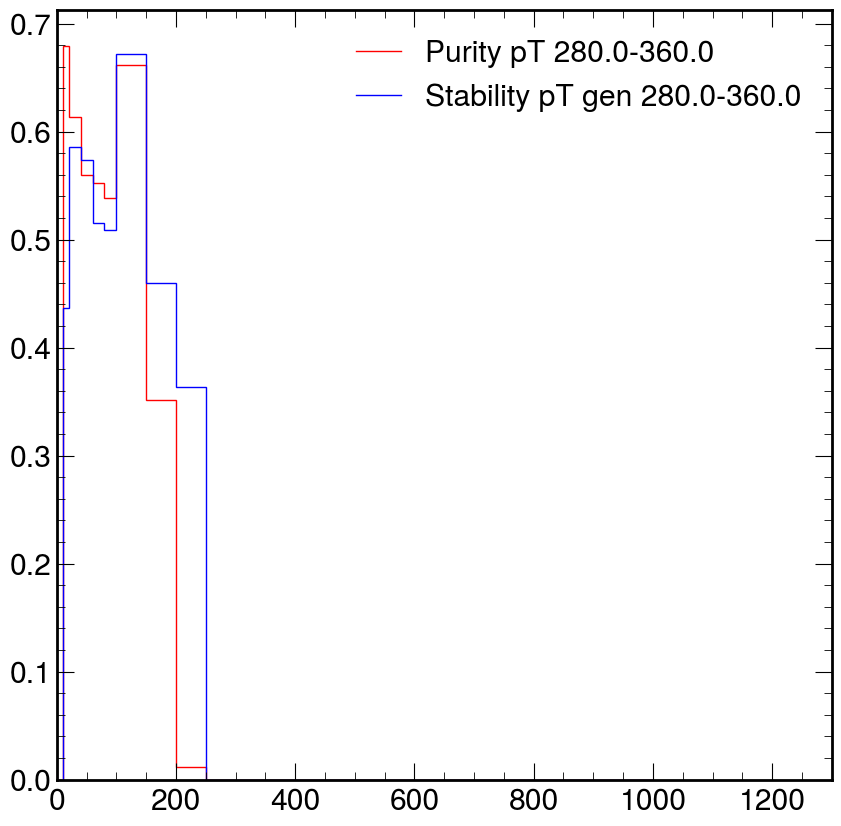

2
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


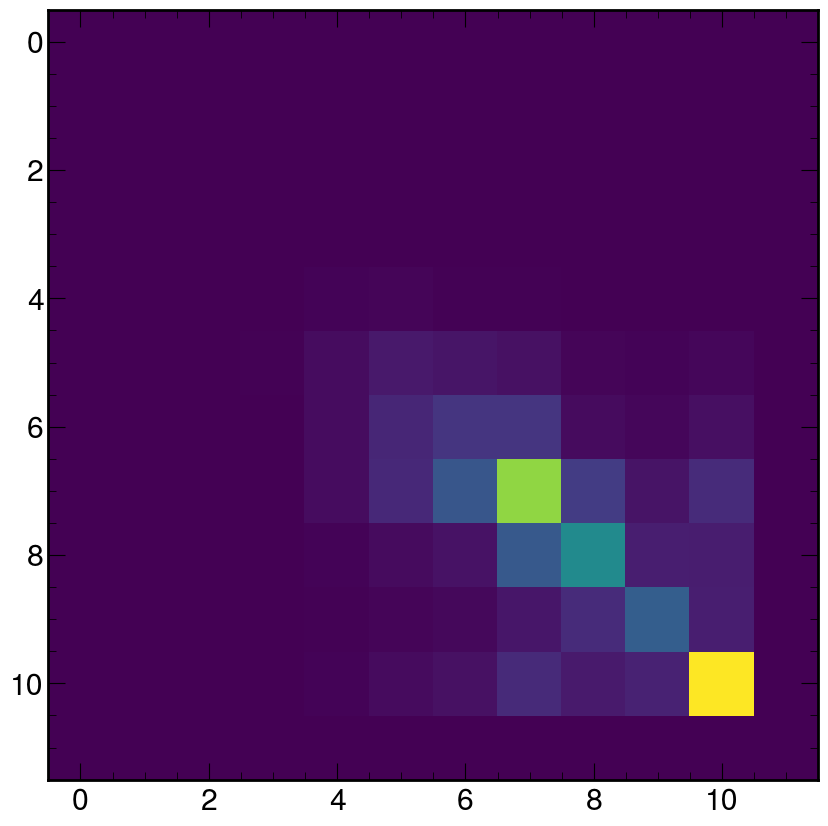

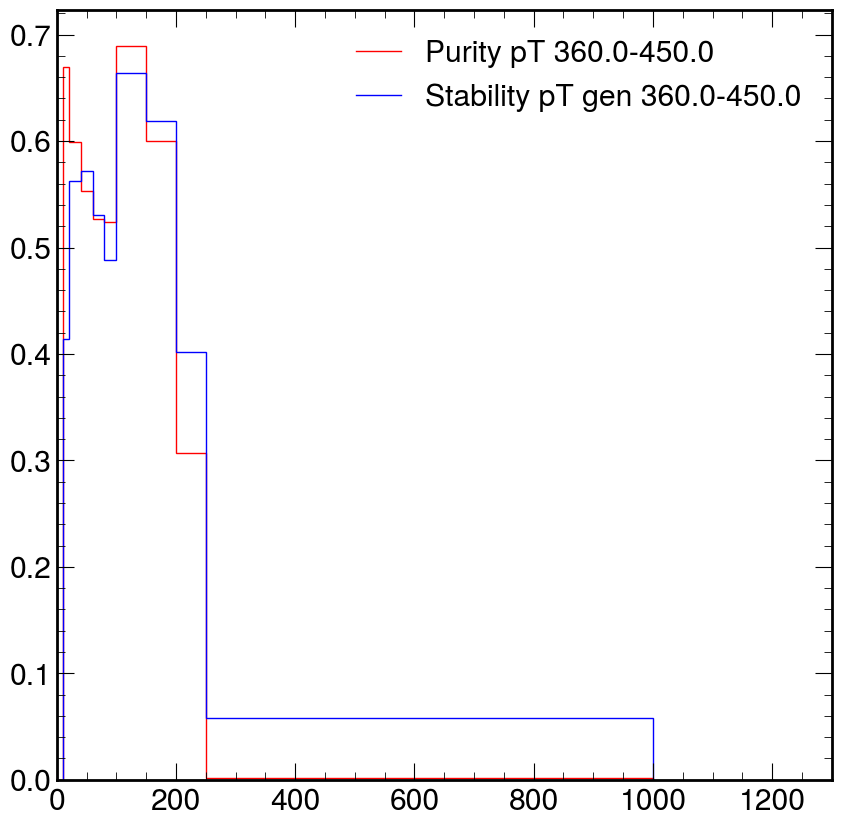

3
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


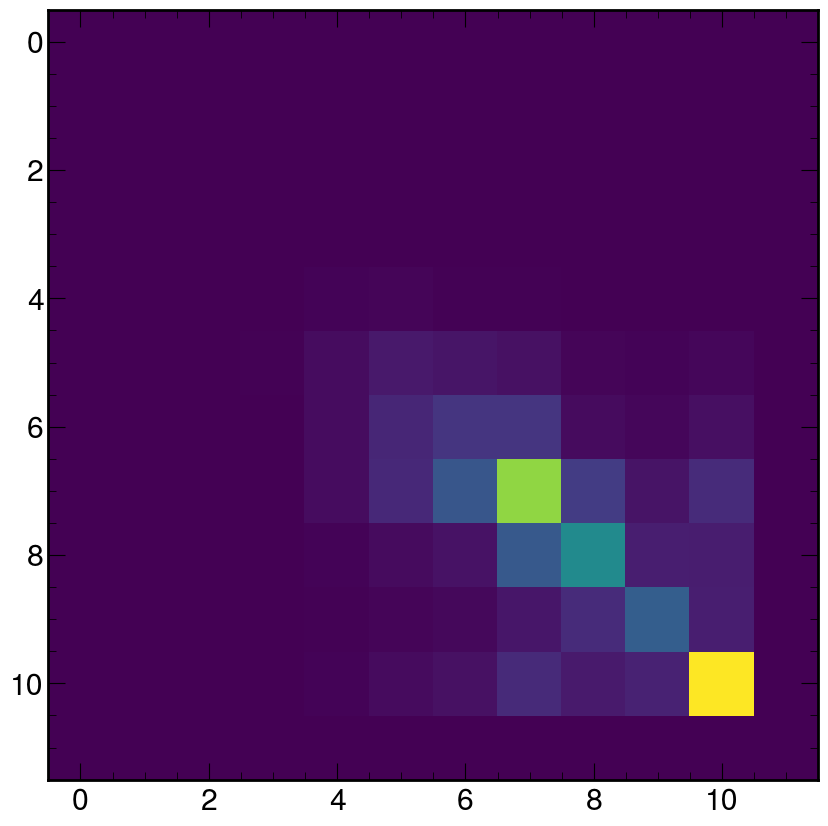

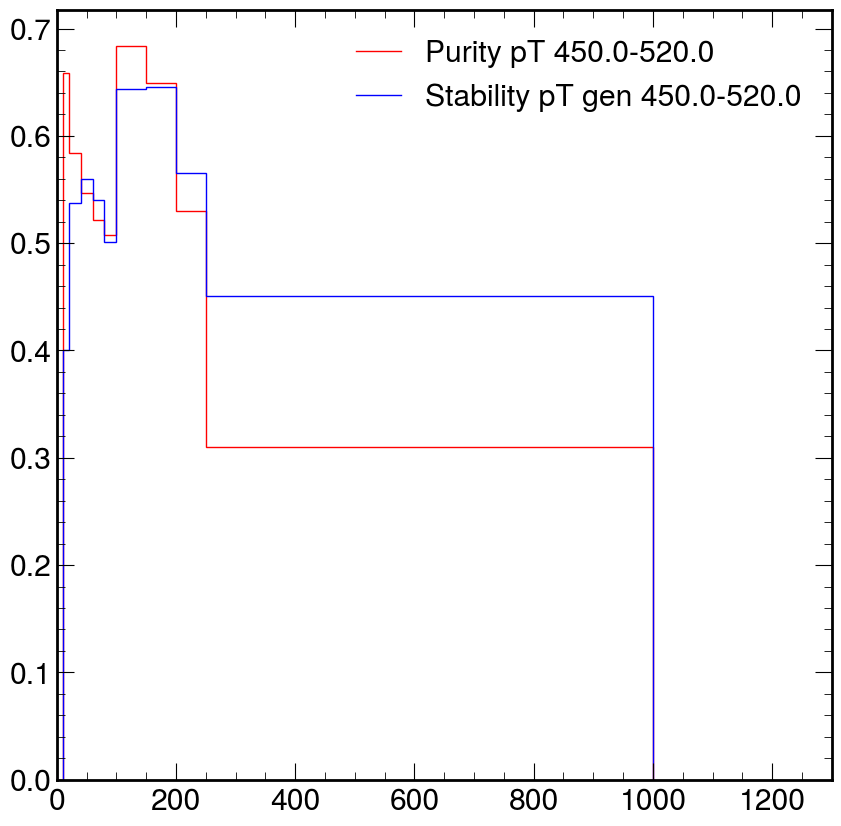

4
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


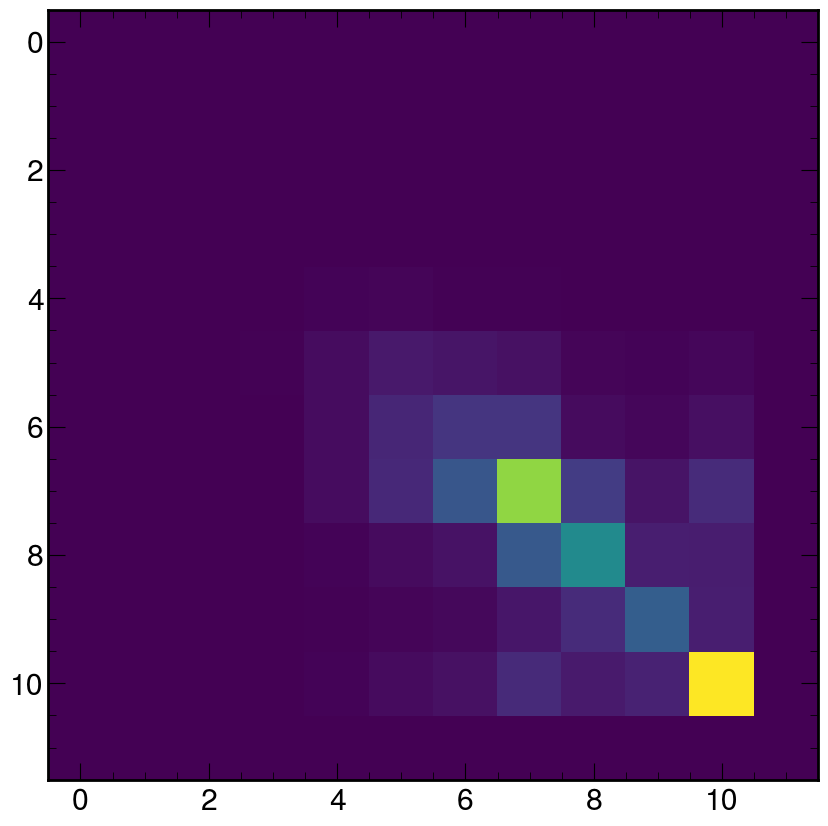

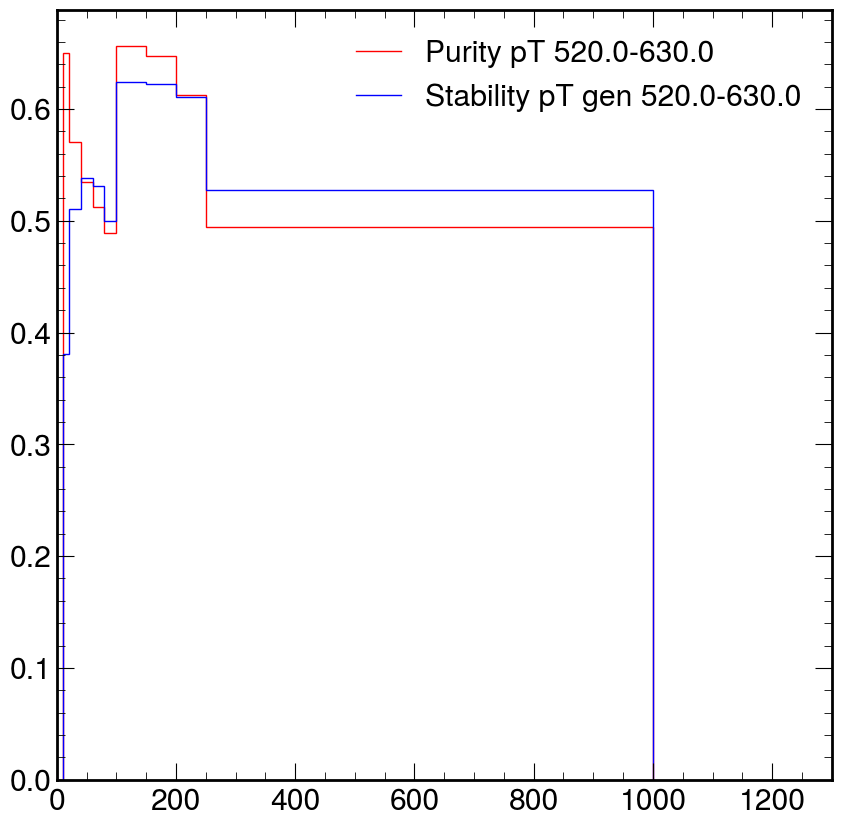

5
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


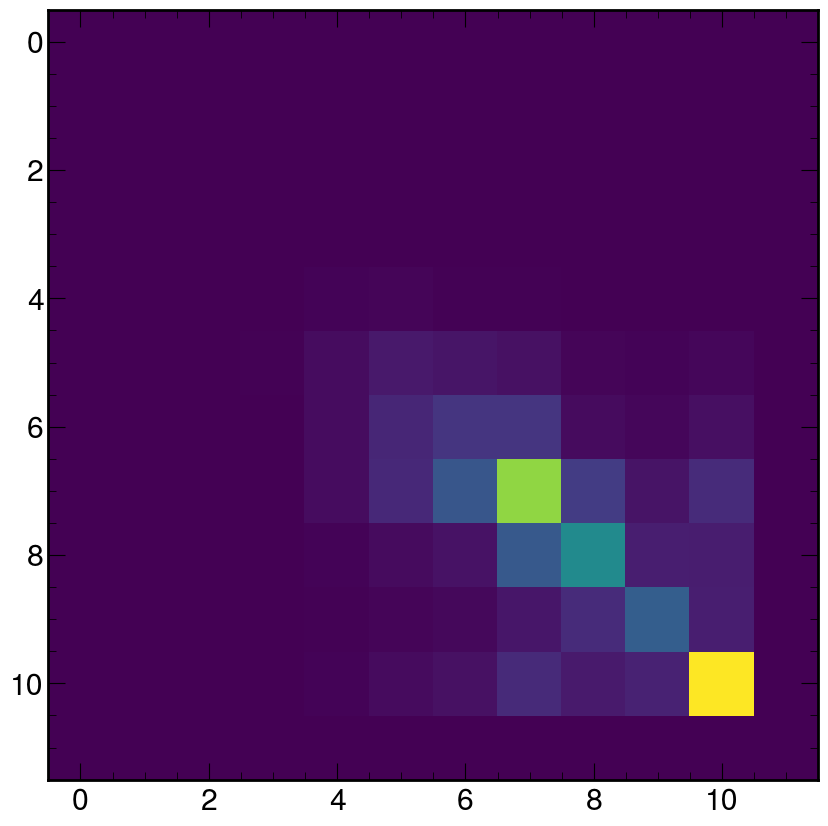

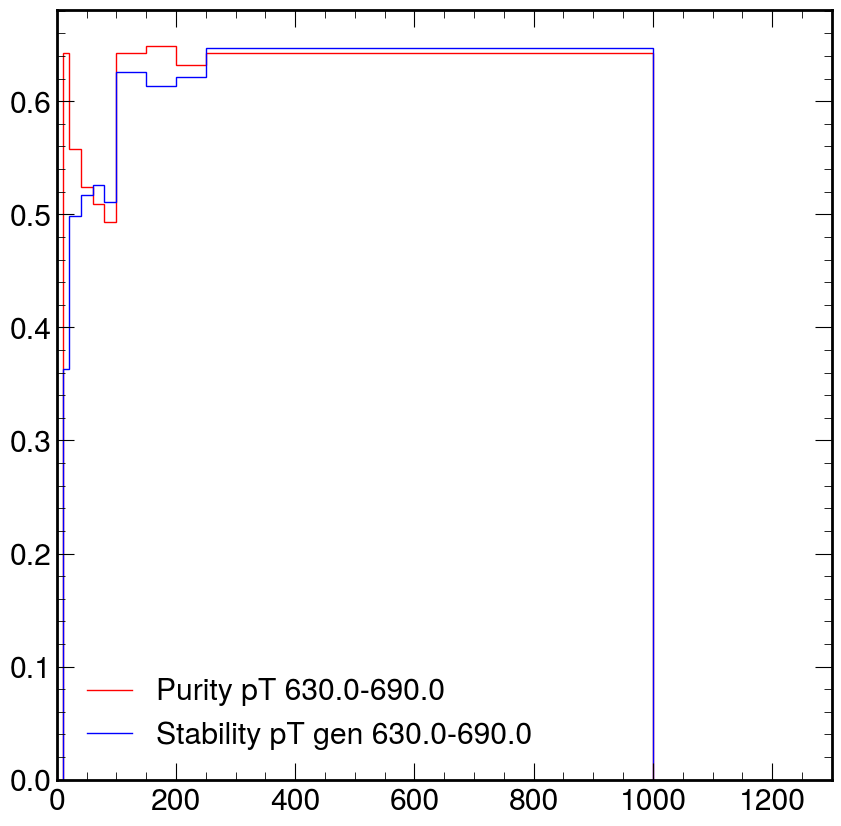

6
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


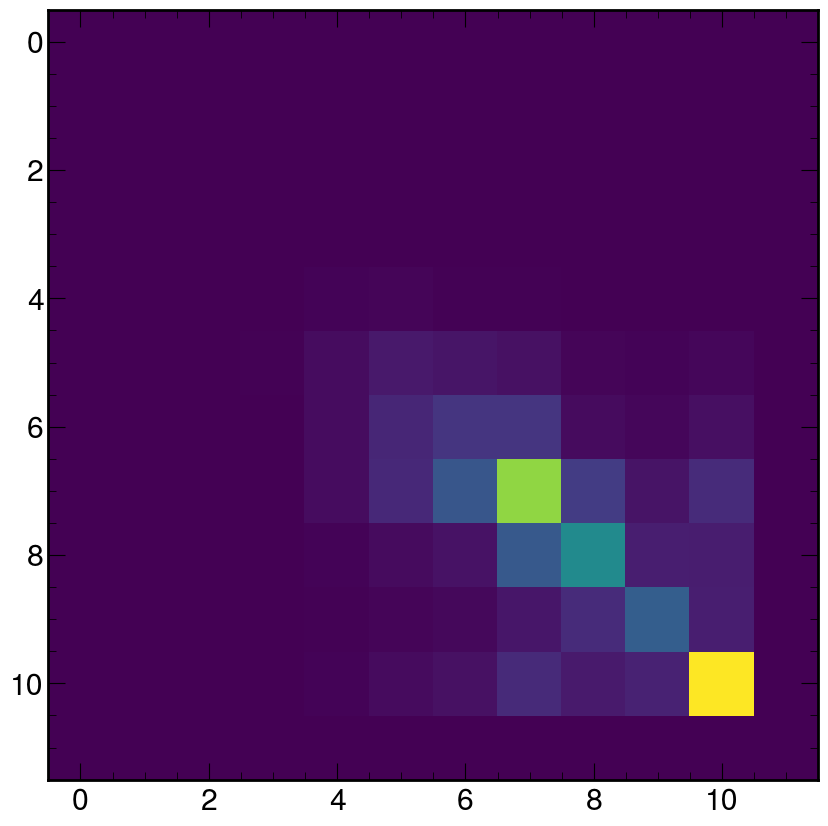

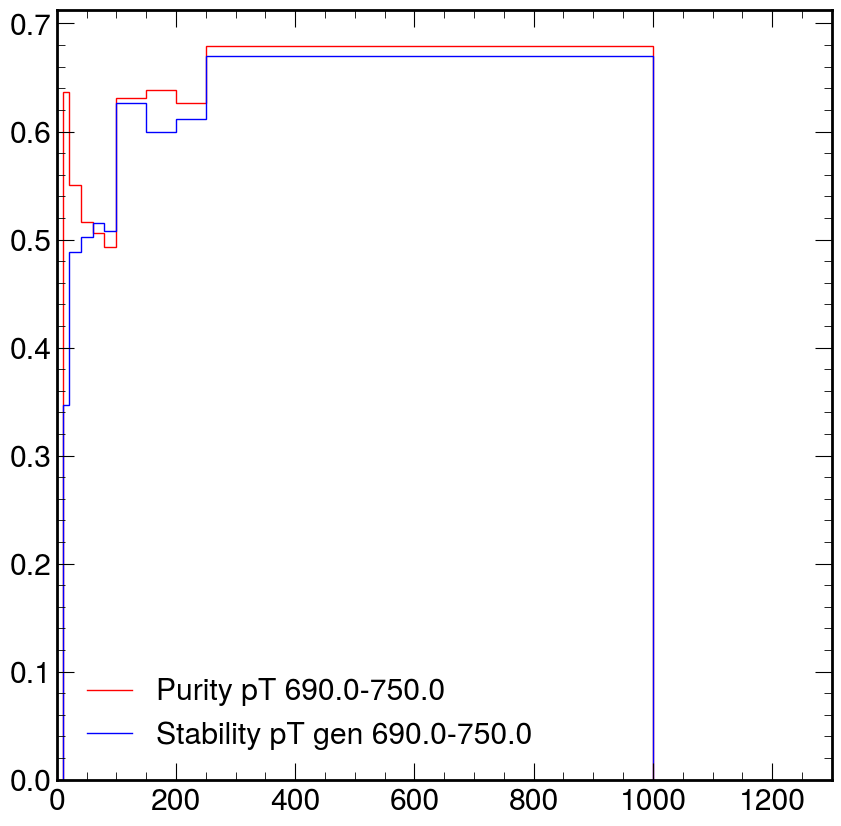

7
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


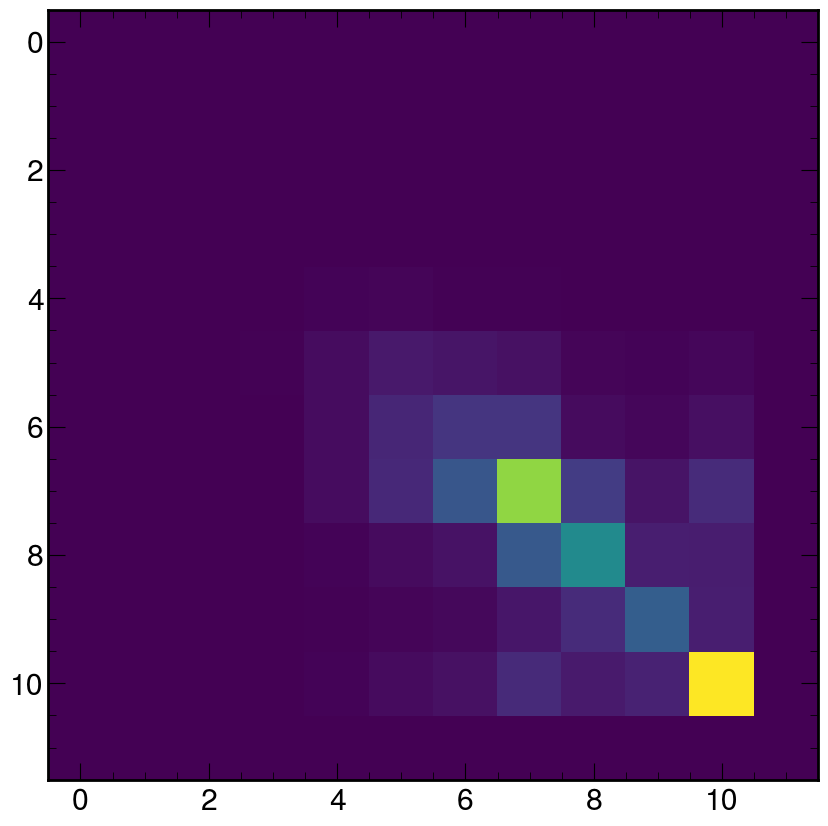

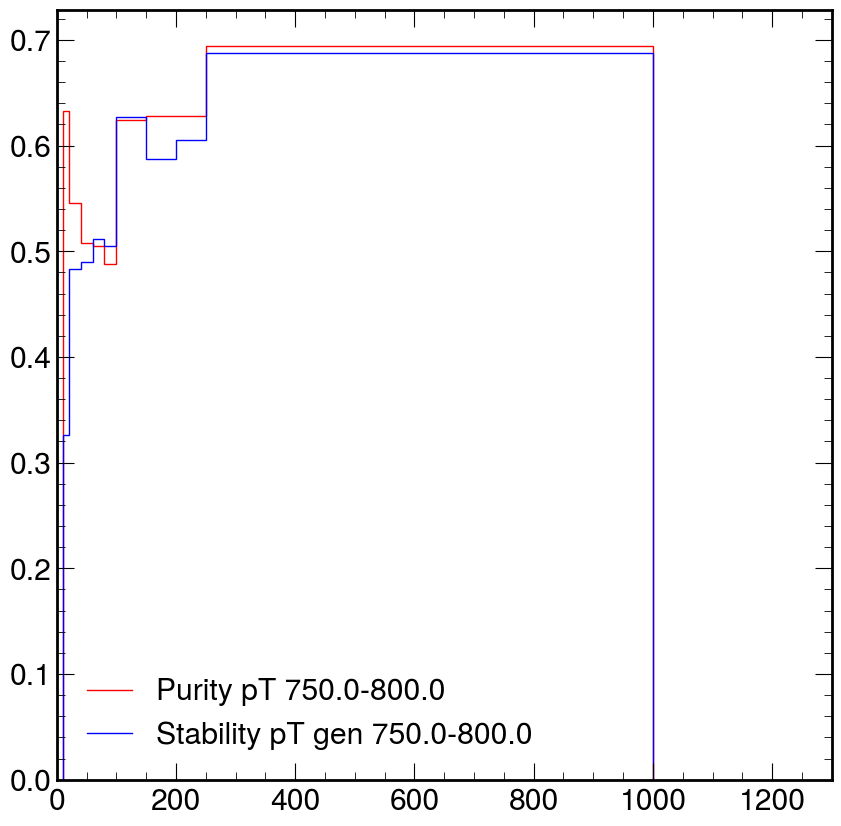

8
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


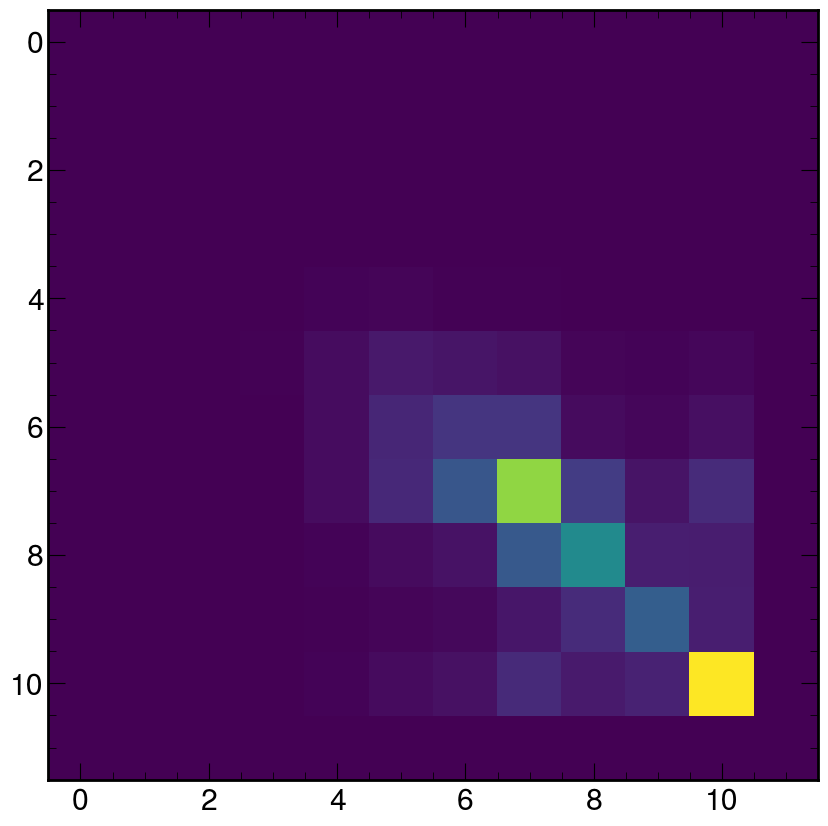

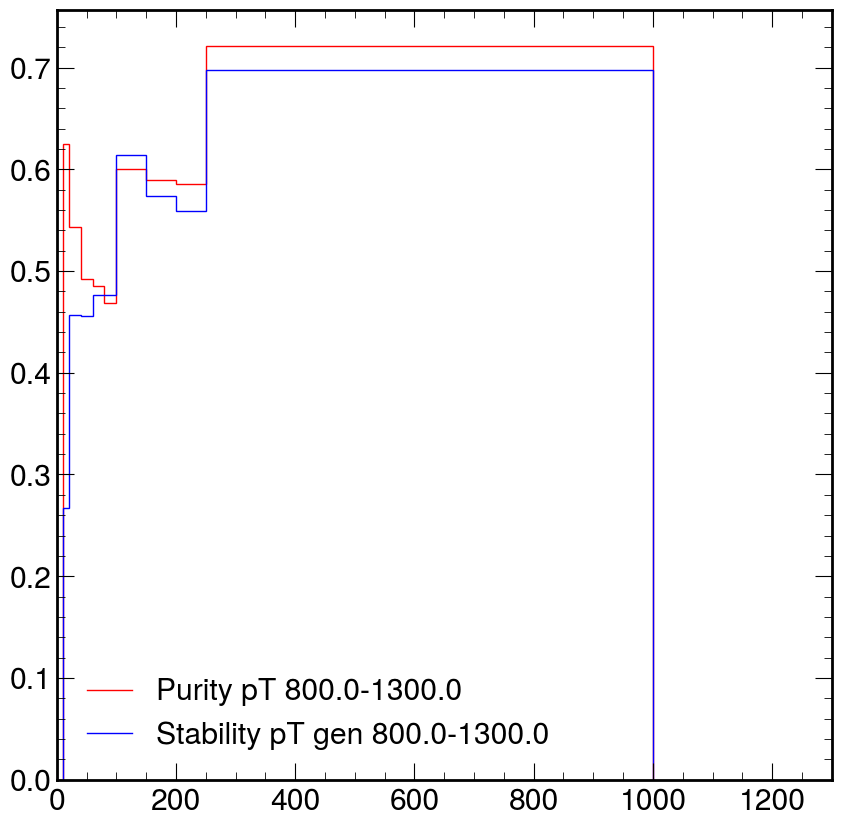

9
[   0.    0.   10.   20.   40.   60.   80.  100.  150.  200.  250. 1000.
   inf]
[0.00000000e+00 6.62341962e+08 1.83414550e+08 5.05884308e+07
 1.07025983e+07 6.86755410e+06 1.05056367e+06 5.74532881e+05
 2.47246203e+05 8.95995842e+05 3.11550286e+04 0.00000000e+00]
WeightedSum(value=1.08012e+08, variance=2.28656e+10)


/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/Users/ren/Library/Python/3.9/lib/python/site-packages/mplhep/plot.py:175: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


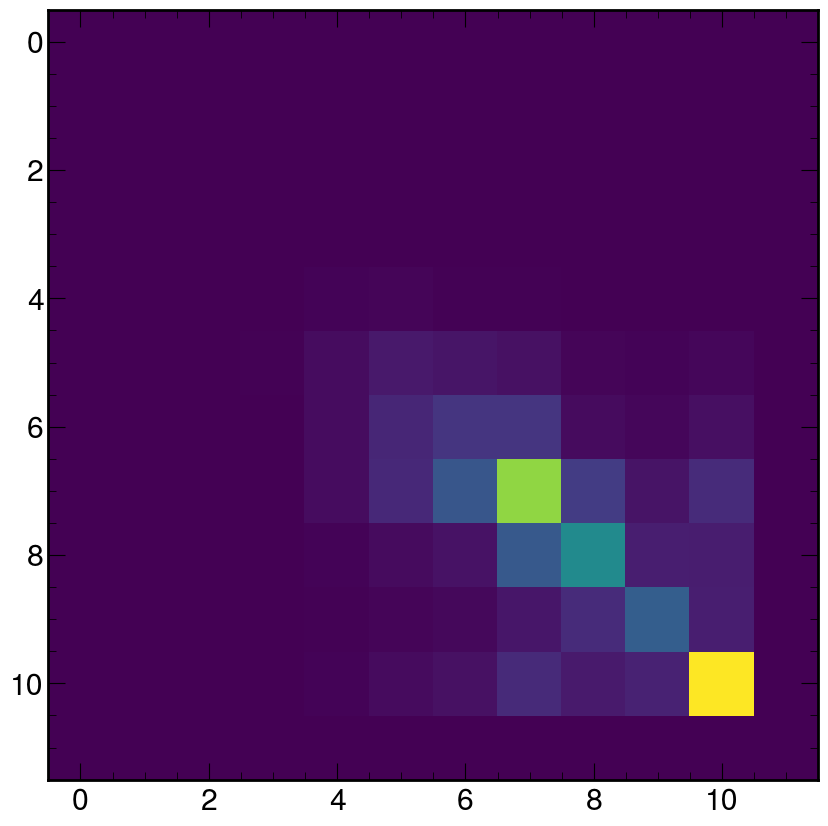

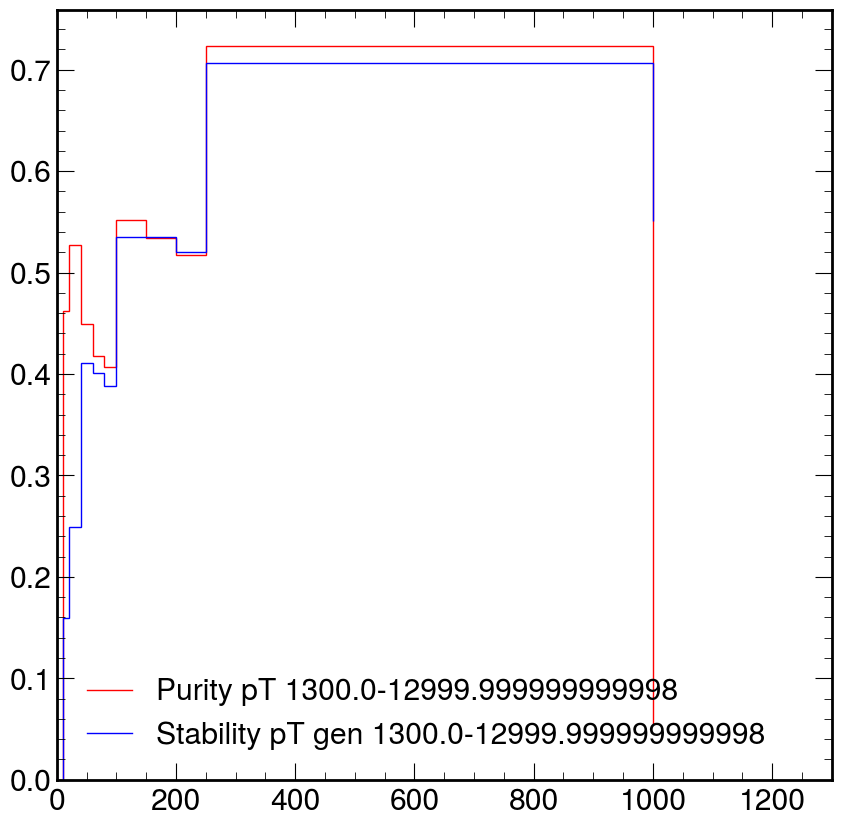

In [86]:
#### Get 1D pT response including underflow
for i in range(len(ptreco_edges)-3):
    print(i)
    mresponse_g, mreco_edges, mgen_edges = result['response_matrix_g'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mreco", "mgen")[hist.rebin(2), :].to_numpy(flow=True)
    plt.imshow(mresponse_u)
    mreco_edges[0]=0.
    mgen_edges[0]=0.
    print(mgen_edges)
    m_diags = np.array([mresponse_g[j,j] for j in range(len(mgen_edges)-1)])
    print(pt_diags)
    mgen_tot_vals = result['response_matrix_g'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mgen").values(flow=True)
    mreco_tot_vals = result['response_matrix_g'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mreco")[hist.rebin(2)].values(flow=True)
    purity_vals = np.divide(m_diags, mgen_tot_vals, out=np.zeros_like(mgen_tot_vals), where=mgen_tot_vals!=0)
    stability_vals = np.divide(m_diags, mreco_tot_vals, out=np.zeros_like(mreco_tot_vals), where=mreco_tot_vals!=0)
    fig, ax = plt.subplots()
    hep.histplot(purity_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax,color = 'Red', linewidth=1,
                     label="Purity pT "+str(ptreco_edges[i+1])+"-"+str(ptreco_edges[i+2]))
    print(ptgen_hist[hist.underflow])
    hep.histplot(stability_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax, color = 'Blue', linewidth=1,
                     label="Stability pT gen "+str(ptgen_edges[i+1])+"-"+str(ptgen_edges[i+2]))
    ax.set_xlim(0,1300)
    ax.legend()
    # fig, ax = plt.subplots()
    # hep.histplot(mcvals, stack=False, histtype='step',
    #                  ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
    #                  label=channel + " MC")
    plt.show()